# NDG vs KDE Membership Function Experiment

This notebook compares Neighbor Density Graph (NDG) and Kernel Density Estimation (KDE) methods for computing membership functions on various datasets.

We will compare:
1. Error between NDG and KDE (KL divergence and Chi-squared)
2. Computation time for each method
3. Memory usage

We'll test on:
- Synthetic data (various signal types)
- Opportunity dataset
- PAMAP2 dataset

And we'll examine how these metrics vary with different signal lengths and sigma values.

In [1]:
# Import the experiment script
import exp.ndg_vs_kde as experiment
import matplotlib.pyplot as plt
%matplotlib inline

# Increase figure size for better visibility in the notebook
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 12
})

## 1. Single Experiment

First, let's run a single experiment to compare NDG and KDE on a specific dataset and see the visualization.

Running NDG with sigma=0.3
NDG Computation Time: 0.008621 seconds
KDE Computation Time: 0.009453 seconds
NDG Memory Usage: 23.11 MB
KDE Memory Usage: 0.75 MB
KL Divergence: 0.000000
Chi-Squared: 0.000000


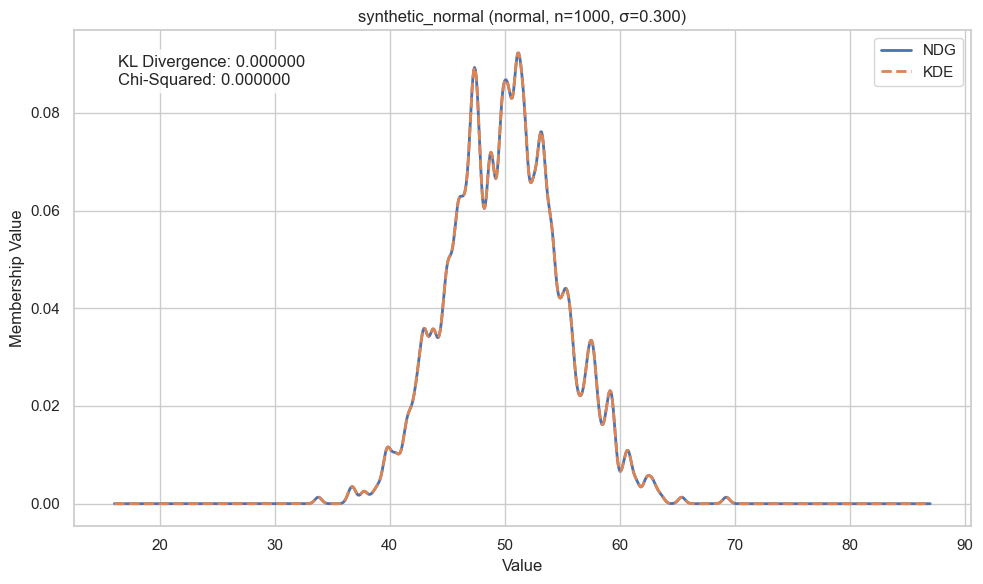

In [2]:
# Run a single experiment on synthetic data
single_result = experiment.run_single_experiment(
    dataset="synthetic_normal",
    sensor_loc="normal",
    size=1000,
    sigma=0.3
)

# Print performance metrics
print(f"NDG Computation Time: {single_result['ndg_time']:.6f} seconds")
print(f"KDE Computation Time: {single_result['kde_time']:.6f} seconds")
print(f"NDG Memory Usage: {single_result['ndg_memory']:.2f} MB")
print(f"KDE Memory Usage: {single_result['kde_memory']:.2f} MB")
print(f"KL Divergence: {single_result['kl_divergence']:.6f}")
print(f"Chi-Squared: {single_result['chi_squared']:.6f}")

## 2. Experiment with Different Sigma Values

Now, let's compare how different sigma values affect the membership functions.

Running NDG with sigma=0.1

Sigma = 0.1:
KL Divergence: 0.000000
Chi-Squared: 0.000000
Running NDG with sigma=0.3

Sigma = 0.3:
KL Divergence: 0.000000
Chi-Squared: 0.000000
Running NDG with sigma=0.5

Sigma = 0.5:
KL Divergence: 0.000000
Chi-Squared: 0.000000
Running NDG with sigma=3.5469994153618973

Sigma = r0.1:
KL Divergence: 0.000000
Chi-Squared: 0.000000
Running NDG with sigma=10.64099824608569

Sigma = r0.3:
KL Divergence: 0.000000
Chi-Squared: 0.000000


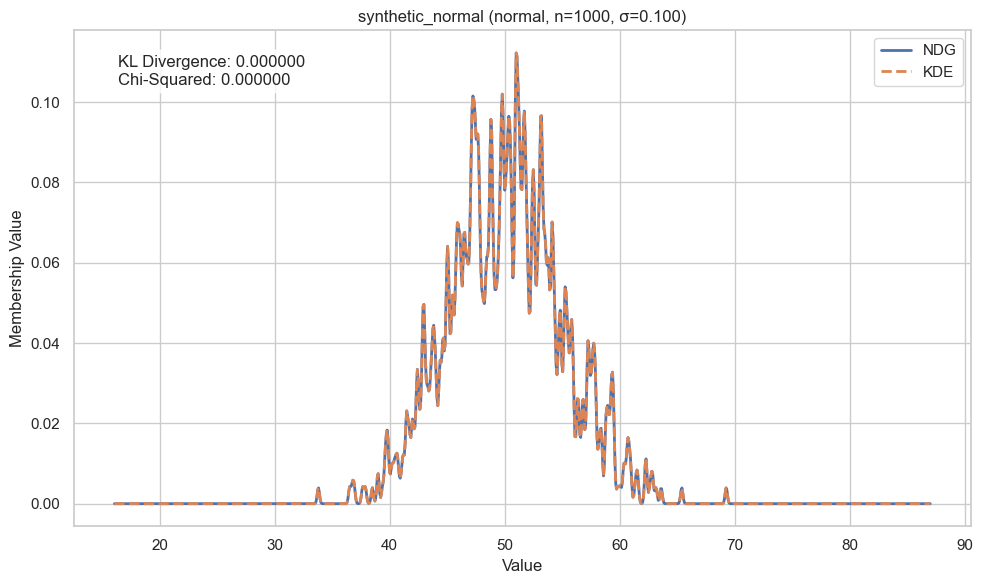

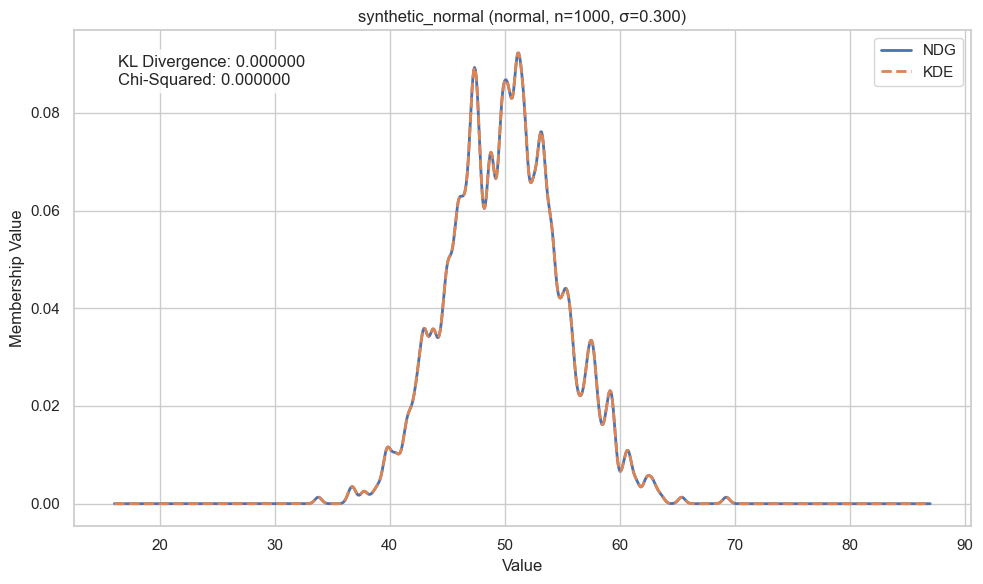

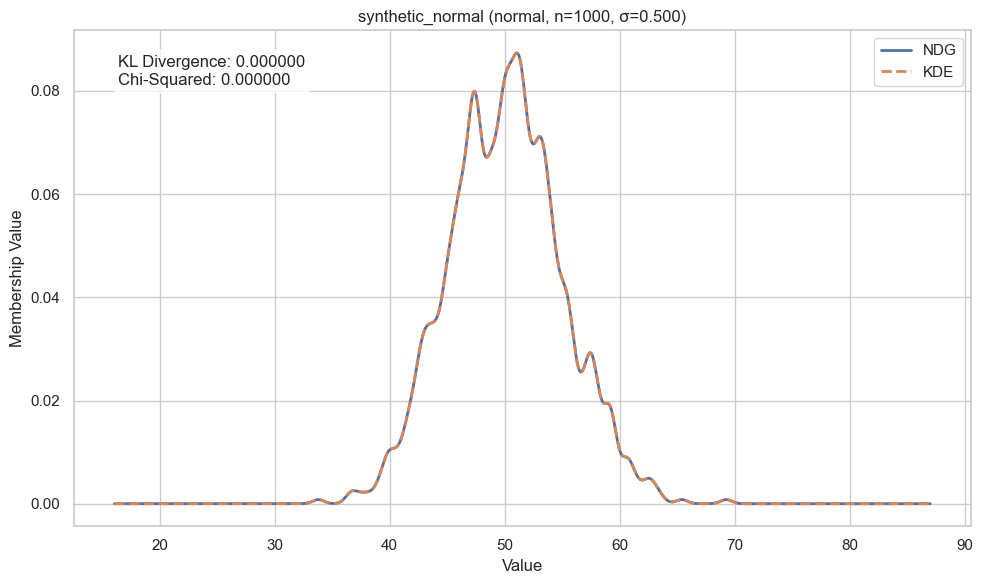

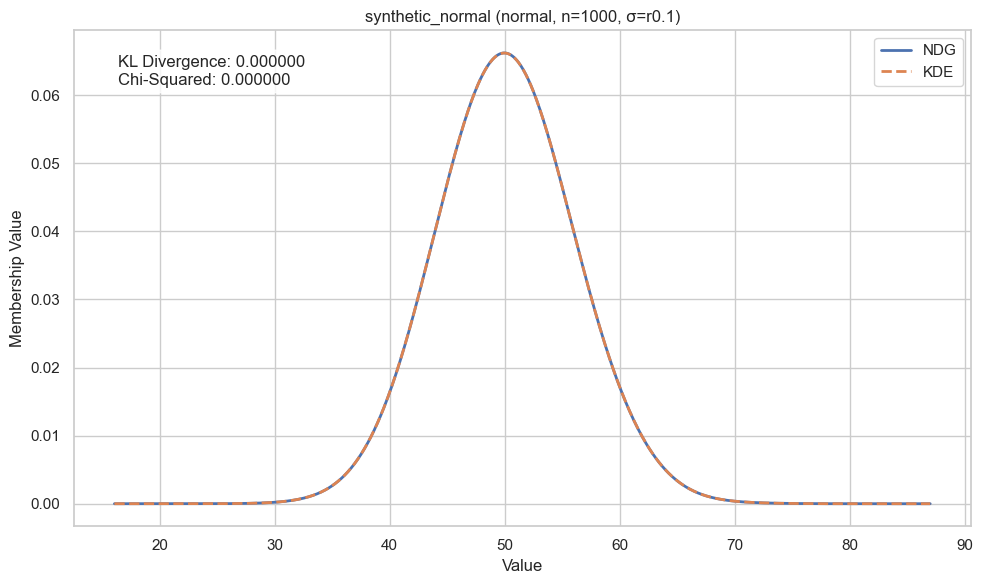

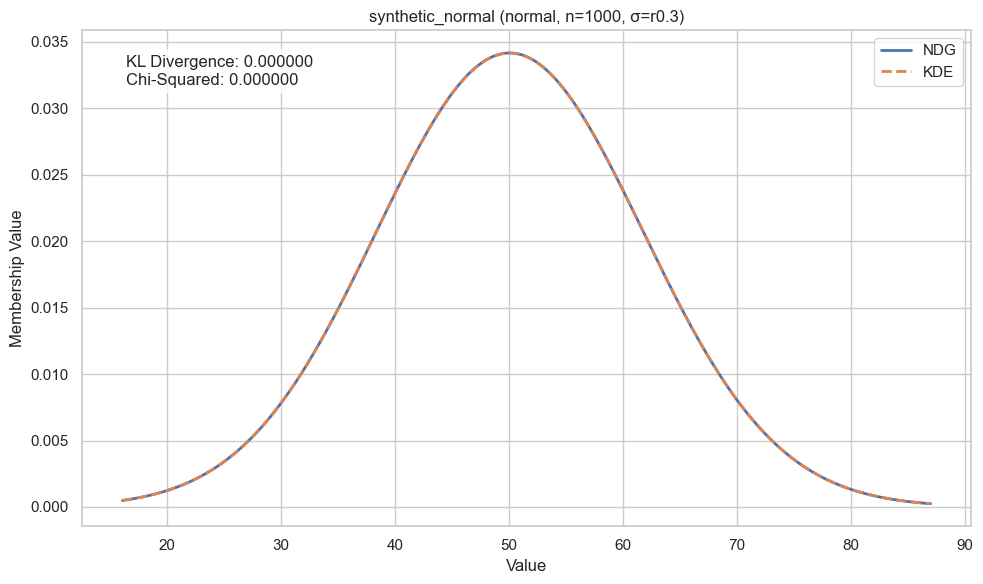

In [3]:
# Test different sigma values on the same dataset
sigma_results = []
dataset = "synthetic_normal"
sensor_loc = "normal"
size = 1000
sigma_values = [0.1, 0.3, 0.5, 'r0.1', 'r0.3']  # Absolute and relative sigma values

for sigma in sigma_values:
    result = experiment.run_single_experiment(
        dataset=dataset,
        sensor_loc=sensor_loc,
        size=size,
        sigma=sigma
    )
    sigma_results.append(result)
    sigma_str = sigma if isinstance(sigma, str) else f"{sigma:.1f}"
    print(f"\nSigma = {sigma_str}:")
    print(f"KL Divergence: {result['kl_divergence']:.6f}")
    print(f"Chi-Squared: {result['chi_squared']:.6f}")

## 3. Experiment Across Different Signal Types

Now, let's compare how NDG and KDE perform on different synthetic signal types.

Running NDG with sigma=0.3
Running NDG with sigma=3.5469994153618973
Running NDG with sigma=0.3
Running NDG with sigma=6.936824702453231
Running NDG with sigma=0.3
Running NDG with sigma=9.950856502815277
Running NDG with sigma=0.3
Running NDG with sigma=1.4187997661447582


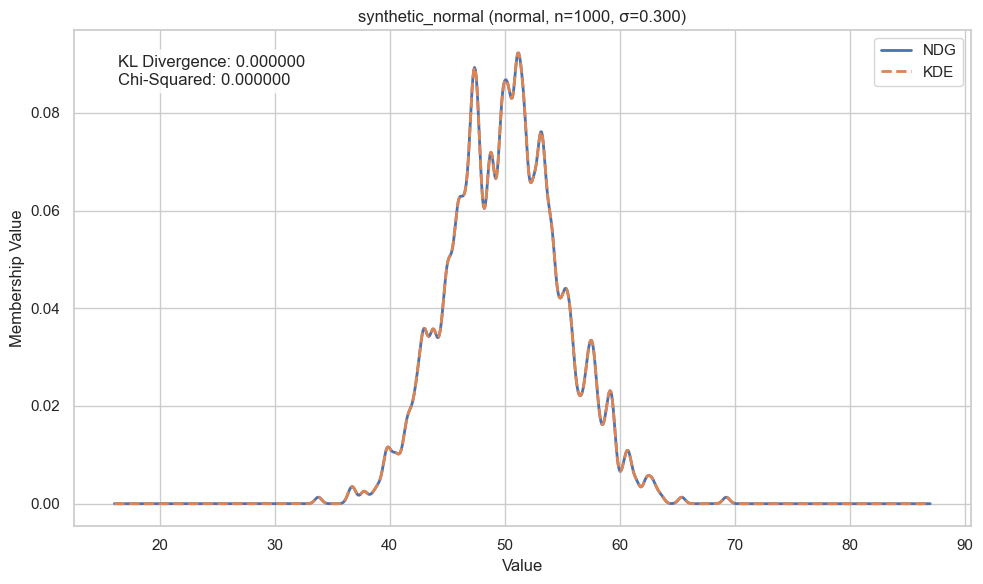

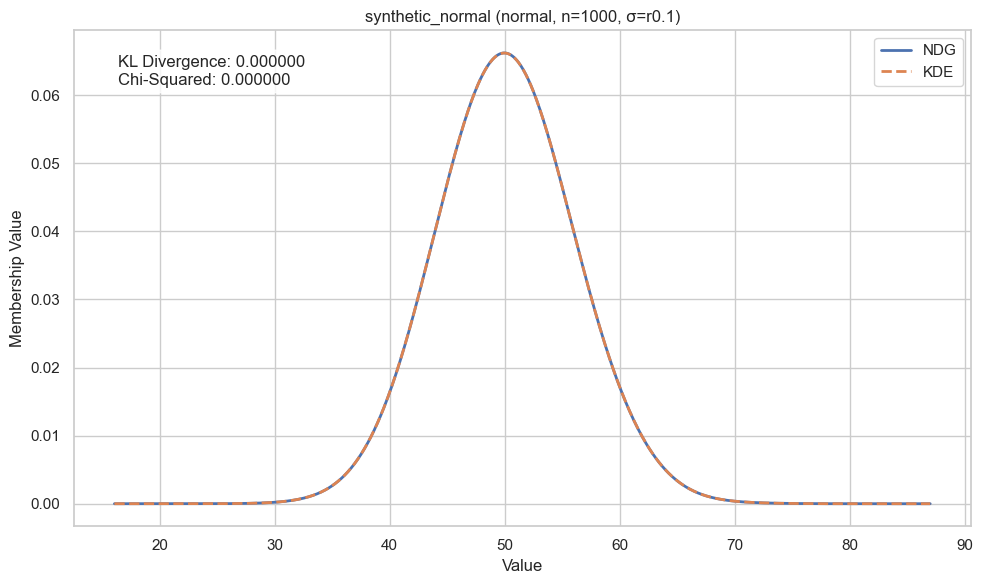

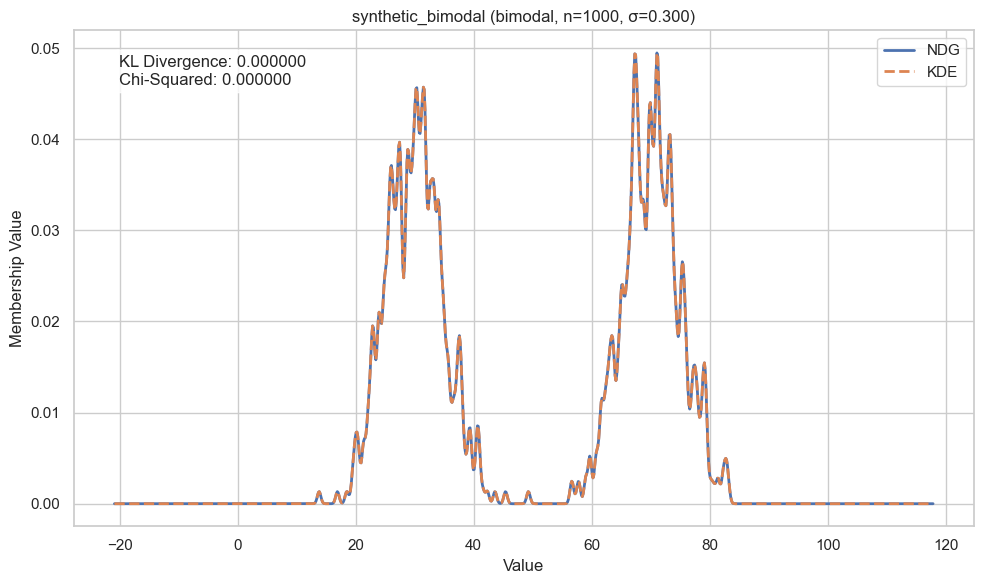

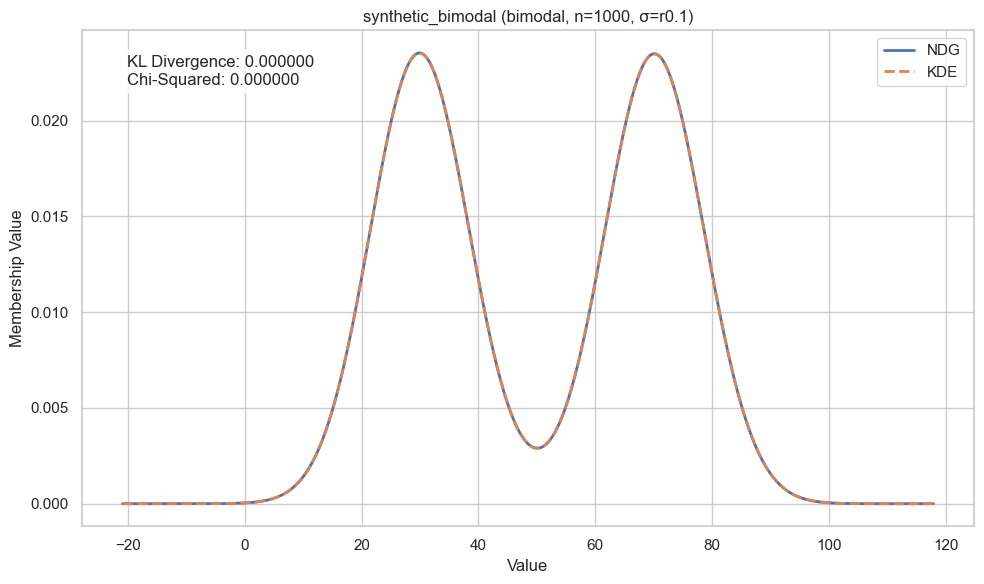

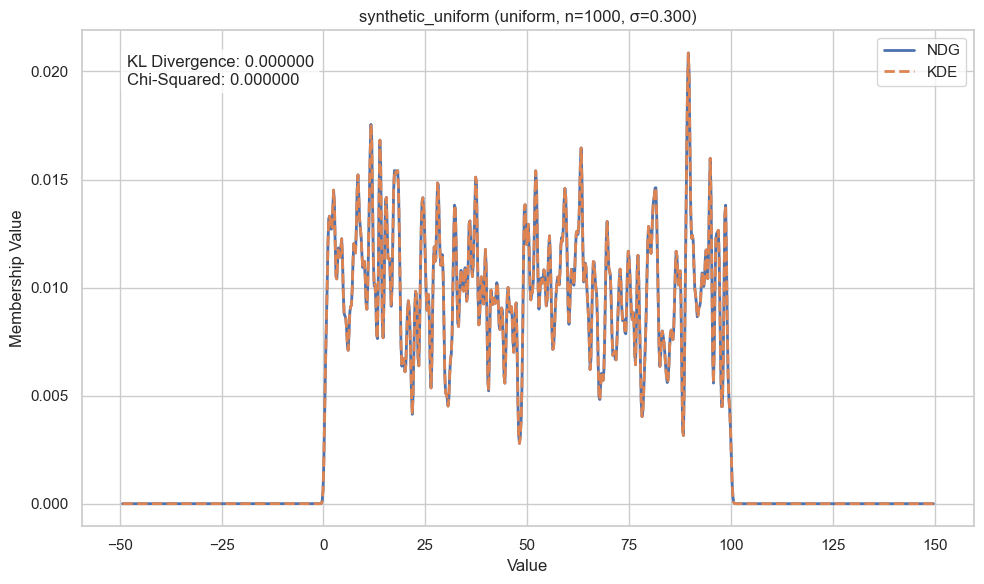

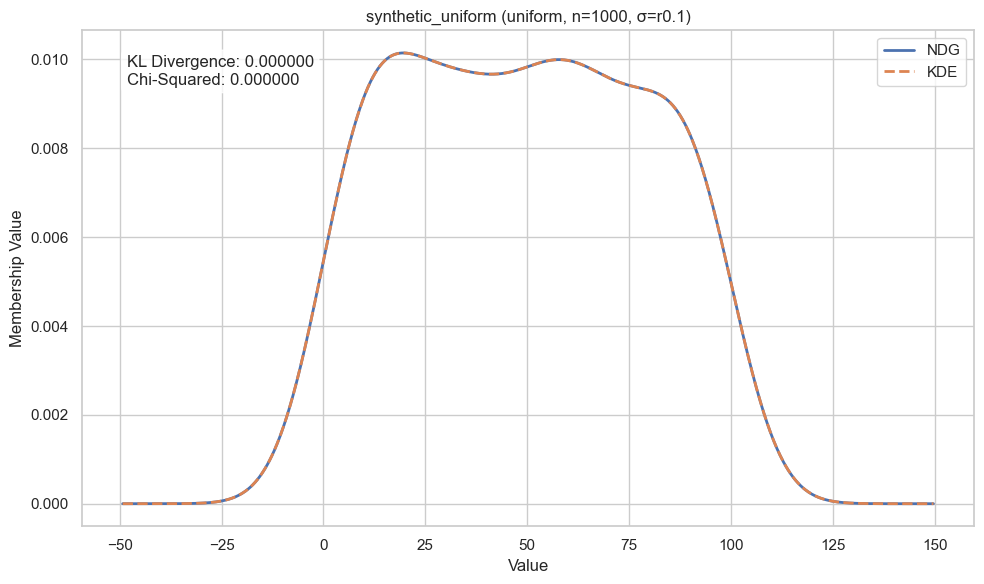

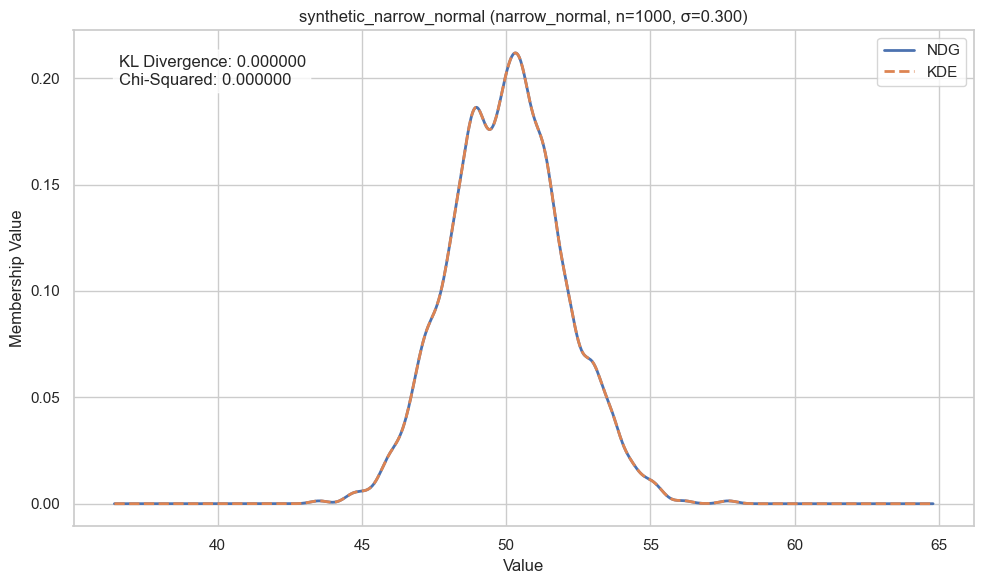

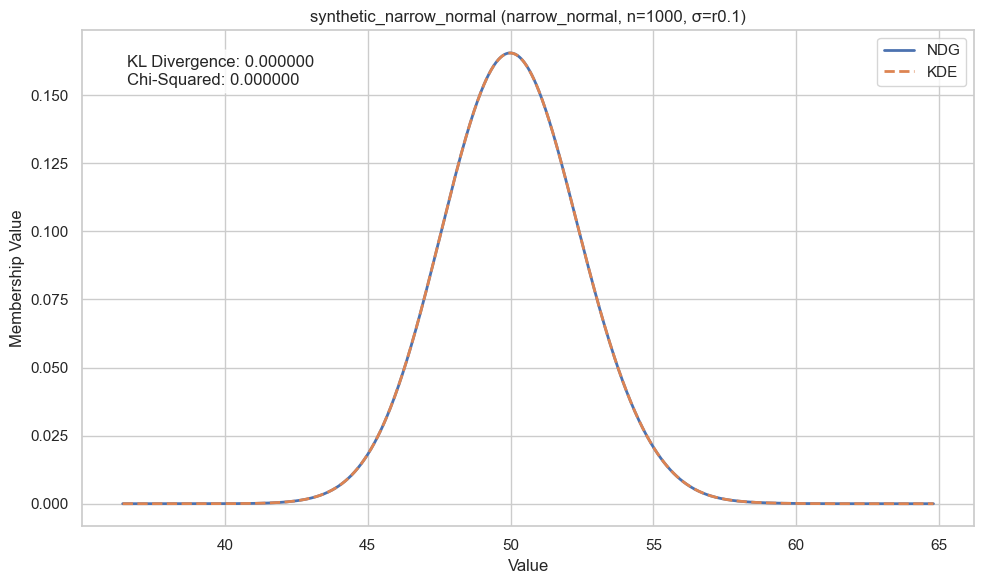

In [4]:
# Define synthetic datasets with different signal types
synthetic_datasets = [
    {"name": "synthetic_normal", "sensor_loc": "normal"},
    {"name": "synthetic_bimodal", "sensor_loc": "bimodal"},
    {"name": "synthetic_uniform", "sensor_loc": "uniform"},
    {"name": "synthetic_narrow_normal", "sensor_loc": "narrow_normal"}
]

# Run experiment for each signal type with a fixed size and both absolute and relative sigma
signal_type_results = []
for dataset in synthetic_datasets:
    # Test with absolute sigma
    result1 = experiment.run_single_experiment(
        dataset=dataset["name"],
        sensor_loc=dataset["sensor_loc"],
        size=1000,
        sigma=0.3
    )
    
    # Test with relative sigma
    result2 = experiment.run_single_experiment(
        dataset=dataset["name"],
        sensor_loc=dataset["sensor_loc"],
        size=1000,
        sigma='r0.1'
    )
    
    signal_type_results.extend([result1, result2])

## 4. Experiment with Real Datasets

Now, let's try with the Opportunity and PAMAP2 datasets.

/Users/nterlemes/personal/thesis/thesis/data/datasets.py:408: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method="ffill", inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:408: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method="ffill", inplace=True)


Running NDG with sigma=0.3


/Users/nterlemes/personal/thesis/thesis/data/datasets.py:408: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method="ffill", inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:408: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method="ffill", inplace=True)


Running NDG with sigma=0.5948319025416976


/Users/nterlemes/personal/thesis/thesis/data/datasets.py:809: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:809: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:926: PerformanceWarning: indexing past lexsort depth may impact performance.
  selected_data = self.df.loc[mask, idx[sensor_type, body_part, measurement_type, axis]]


Running NDG with sigma=0.3


/Users/nterlemes/personal/thesis/thesis/data/datasets.py:809: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)


Running NDG with sigma=0.06171053677741356


/Users/nterlemes/personal/thesis/thesis/data/datasets.py:809: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:926: PerformanceWarning: indexing past lexsort depth may impact performance.
  selected_data = self.df.loc[mask, idx[sensor_type, body_part, measurement_type, axis]]


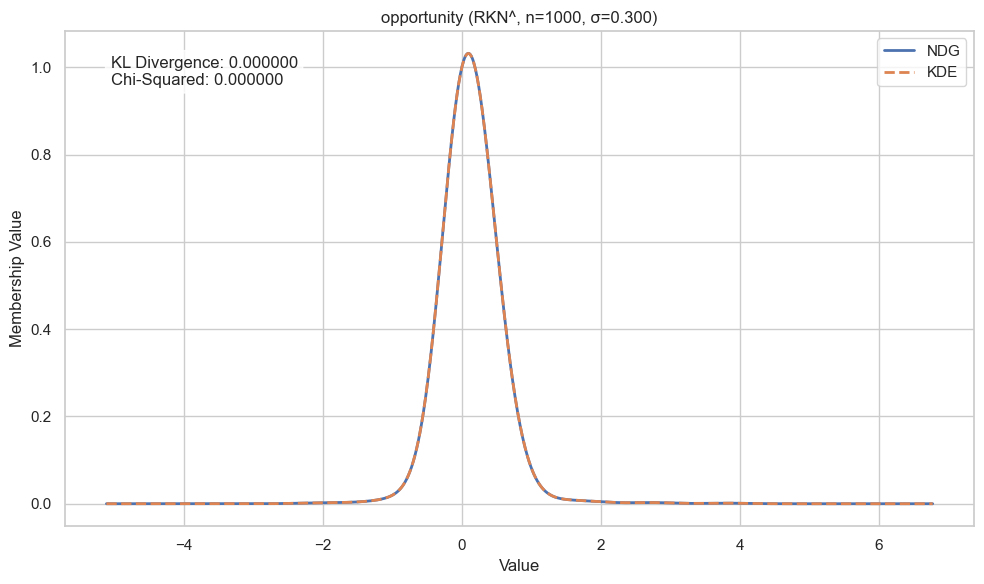

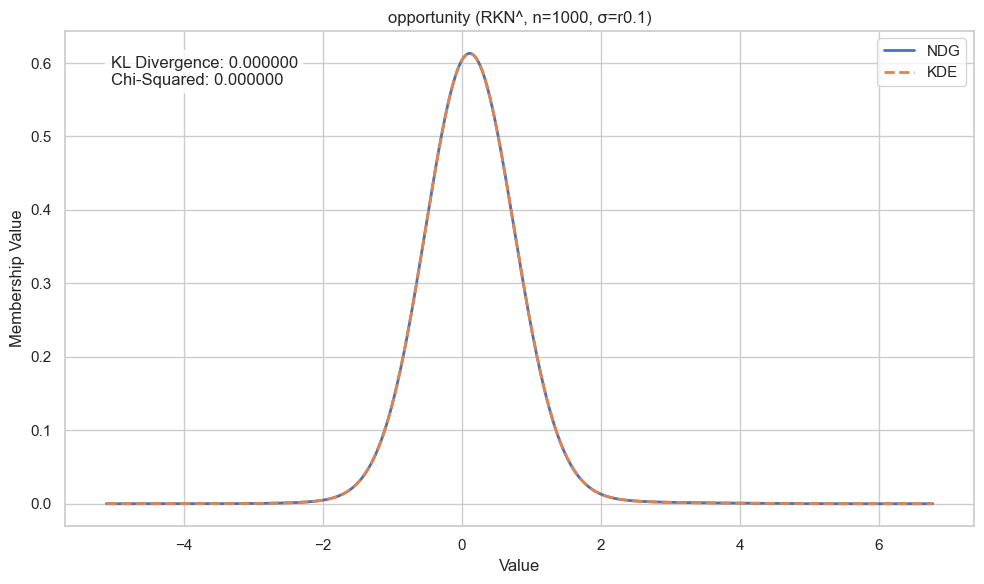

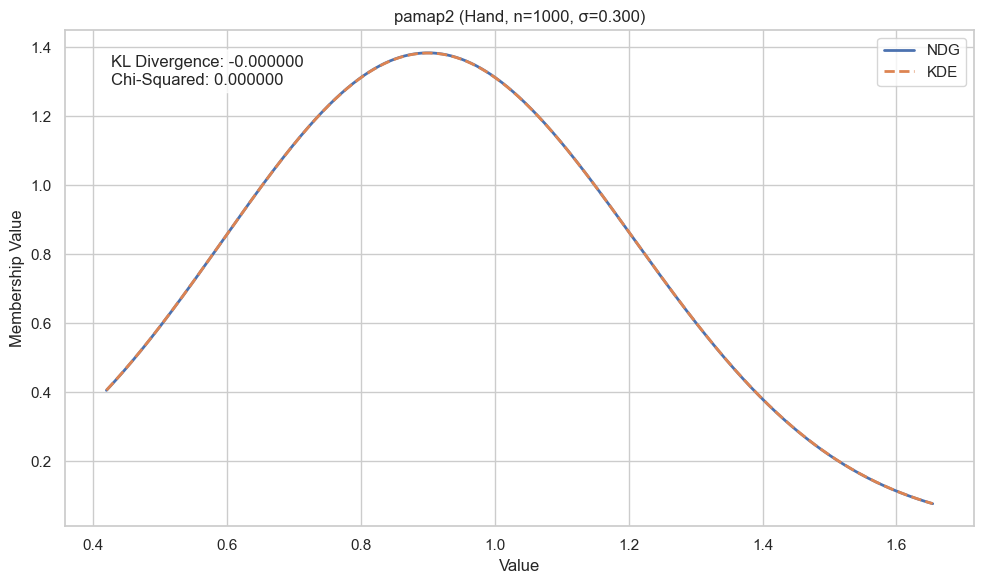

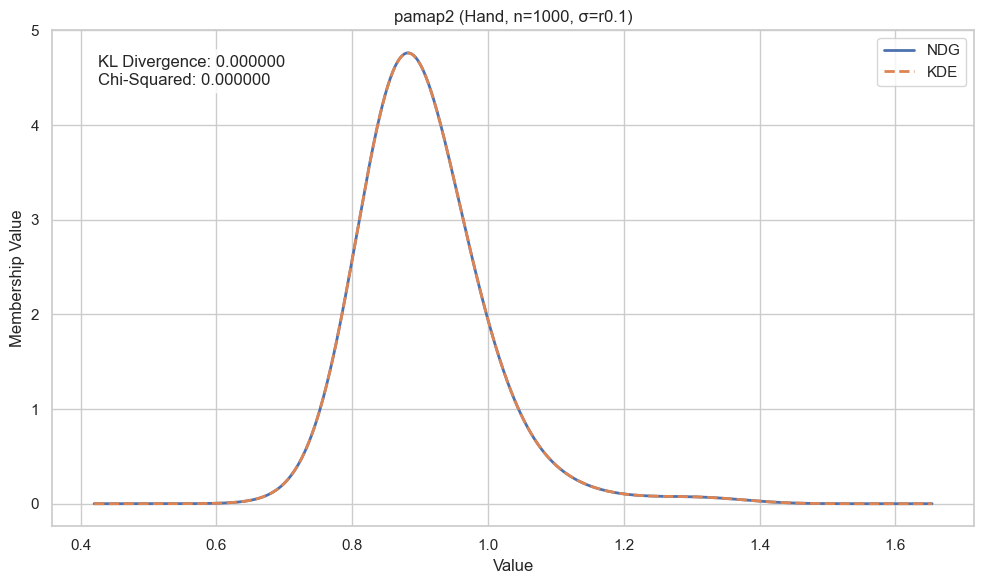

In [5]:
# Run experiments on real datasets
real_datasets = [
    {"name": "opportunity", "sensor_loc": "RKN^"},
    {"name": "pamap2", "sensor_loc": "Hand"}
]

real_dataset_results = []
for dataset in real_datasets:
    # Test with absolute sigma
    result1 = experiment.run_single_experiment(
        dataset=dataset["name"],
        sensor_loc=dataset["sensor_loc"],
        size=1000,
        sigma=0.3
    )
    
    # Test with relative sigma
    result2 = experiment.run_single_experiment(
        dataset=dataset["name"],
        sensor_loc=dataset["sensor_loc"],
        size=1000,
        sigma='r0.1'
    )
    
    real_dataset_results.extend([result1, result2])
    

## 5. Length and Sigma Experiment

Finally, let's run the main experiment comparing NDG and KDE across different data lengths and sigma values.


Running experiments for synthetic_normal (normal)...
  Loaded 20000 data points
  Testing length: 10
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 100
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 1000
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 10000
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3

Running experiments for synthetic_bimodal (bimodal)...
  Loaded 20000 data points
  Testing length: 10
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 100
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 1000
    Sigma: 0.1


/Users/nterlemes/personal/thesis/ndg_vs_kde_experiment.py:118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 10000
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3

Running experiments for opportunity (RKN^)...


/Users/nterlemes/personal/thesis/thesis/data/datasets.py:408: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method="ffill", inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:408: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method="ffill", inplace=True)


  Loaded 20000 data points
  Testing length: 10
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 100
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 1000
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 10000
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3

Running experiments for pamap2 (Hand)...


/Users/nterlemes/personal/thesis/thesis/data/datasets.py:809: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:809: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)
/Users/nterlemes/personal/thesis/thesis/data/datasets.py:926: PerformanceWarning: indexing past lexsort depth may impact performance.
  selected_data = self.df.loc[mask, idx[sensor_type, body_part, measurement_type, axis]]


  Loaded 20000 data points
  Testing length: 10
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 100
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 1000
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3
  Testing length: 10000
    Sigma: 0.1
    Sigma: 0.3
    Sigma: 0.5
    Sigma: r0.1
    Sigma: r0.3


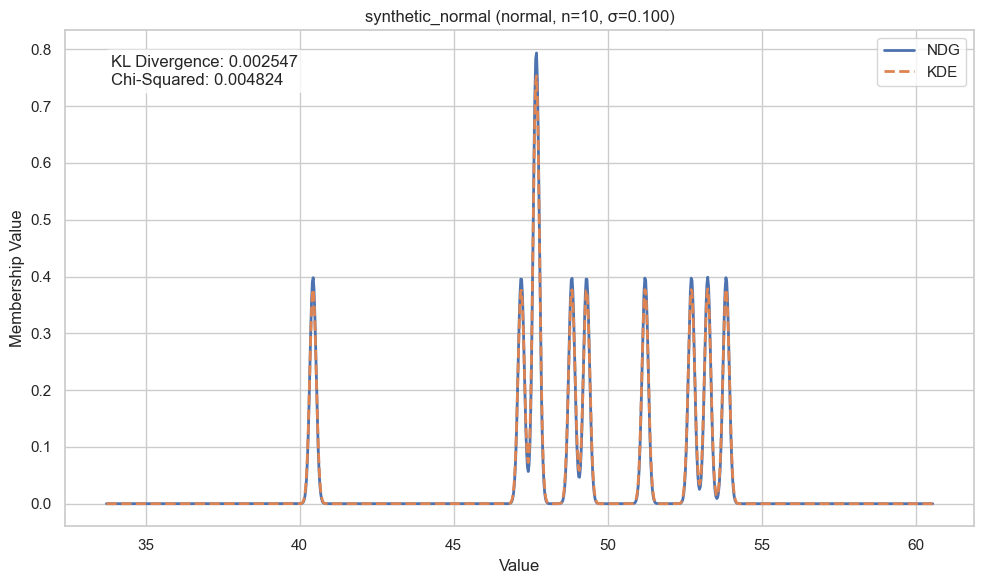

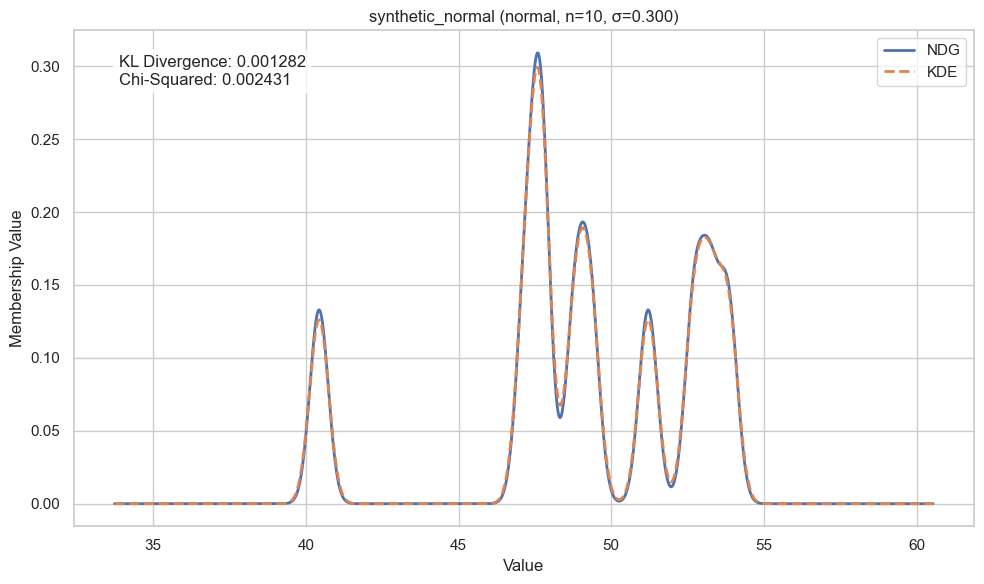

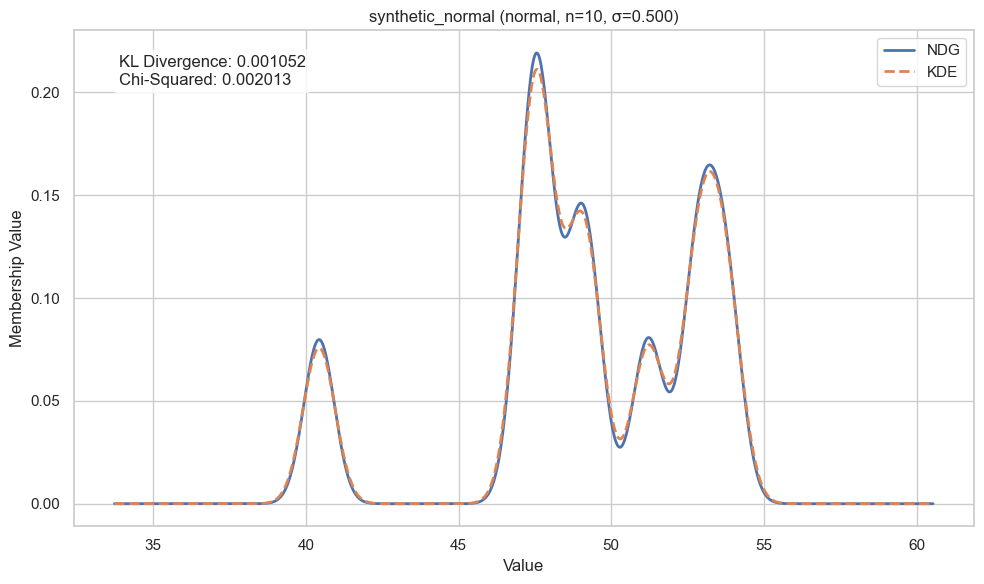

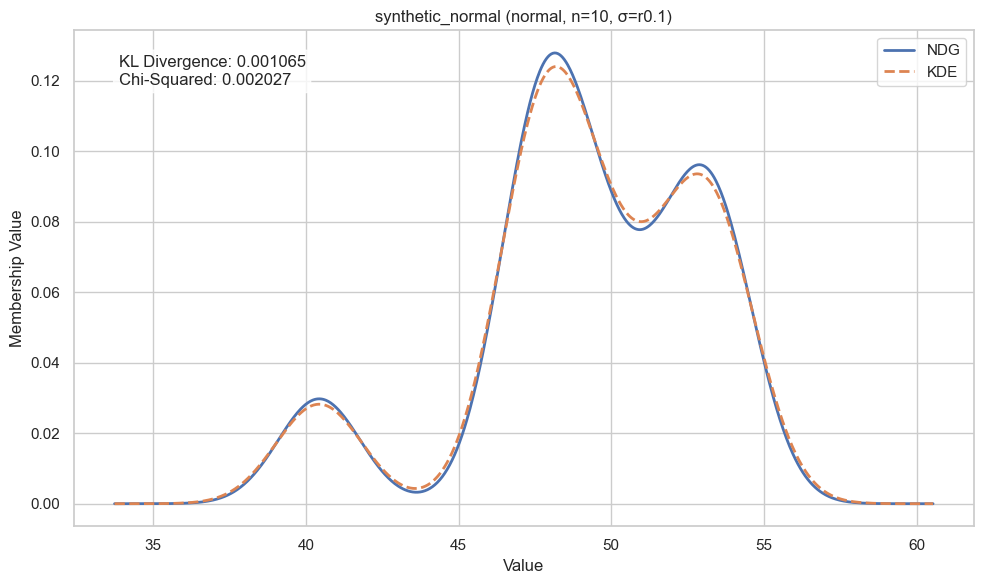

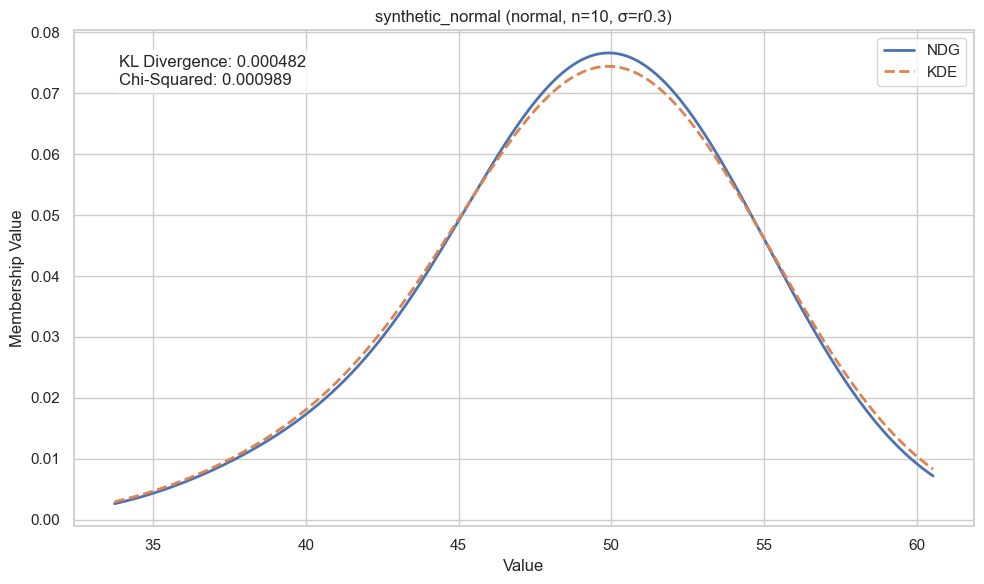

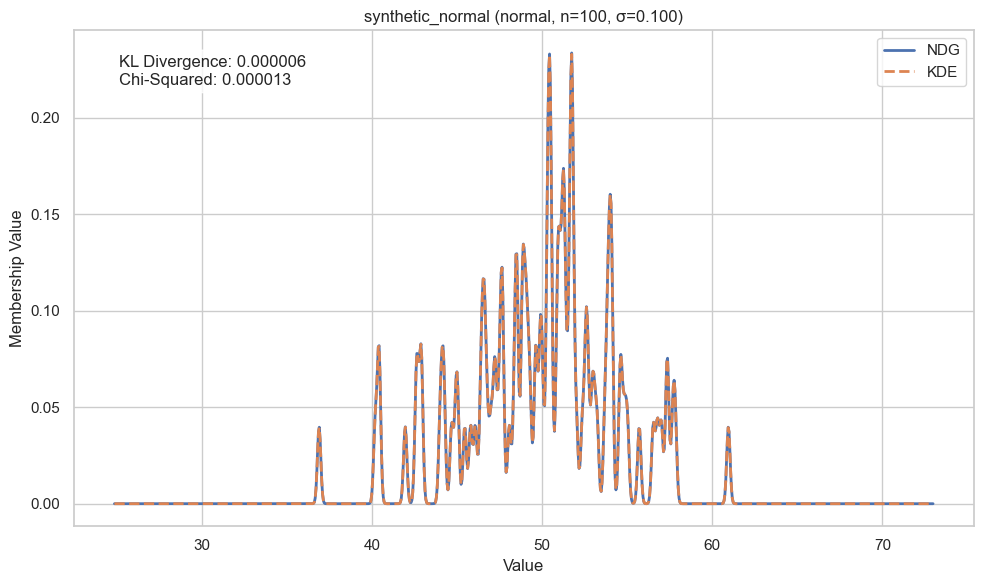

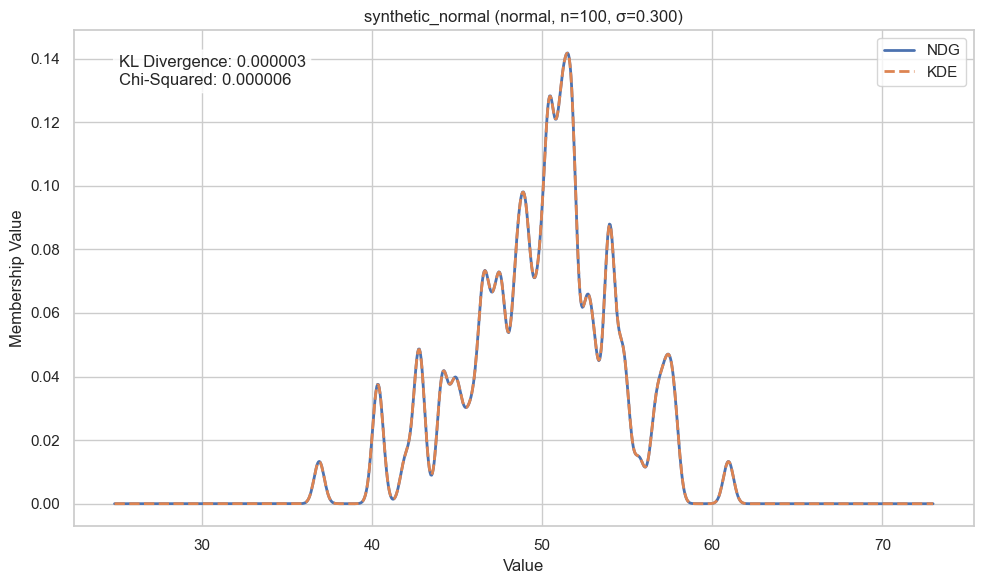

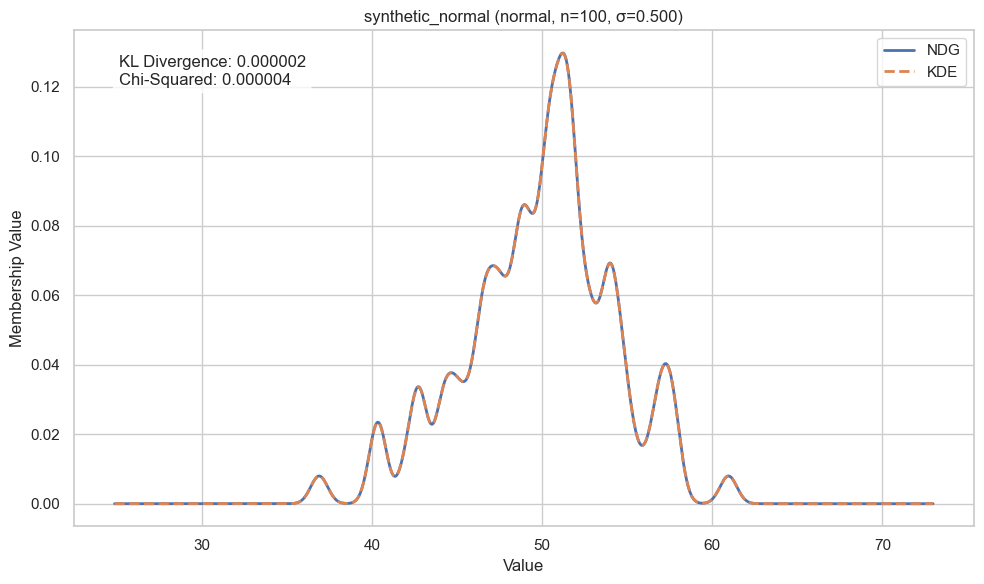

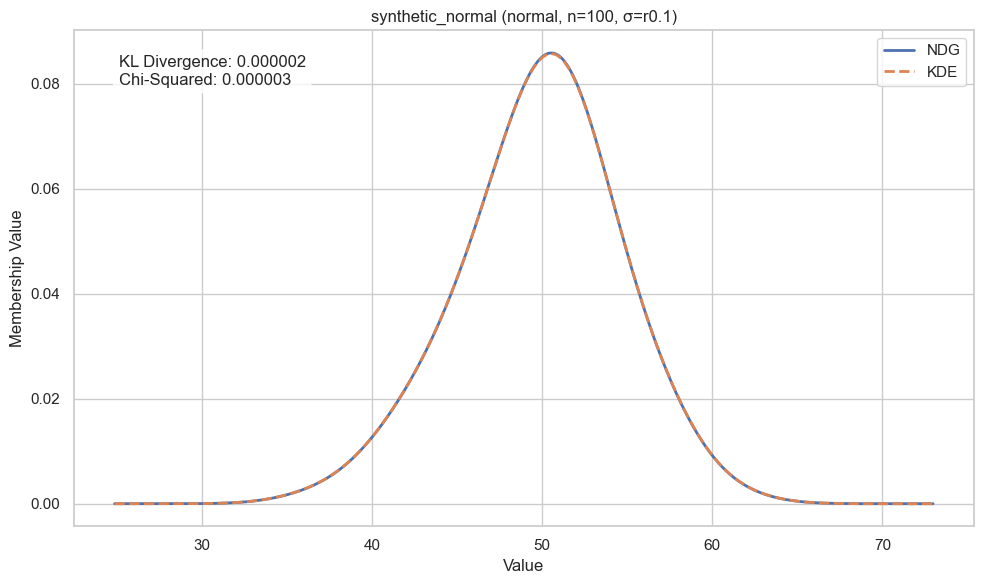

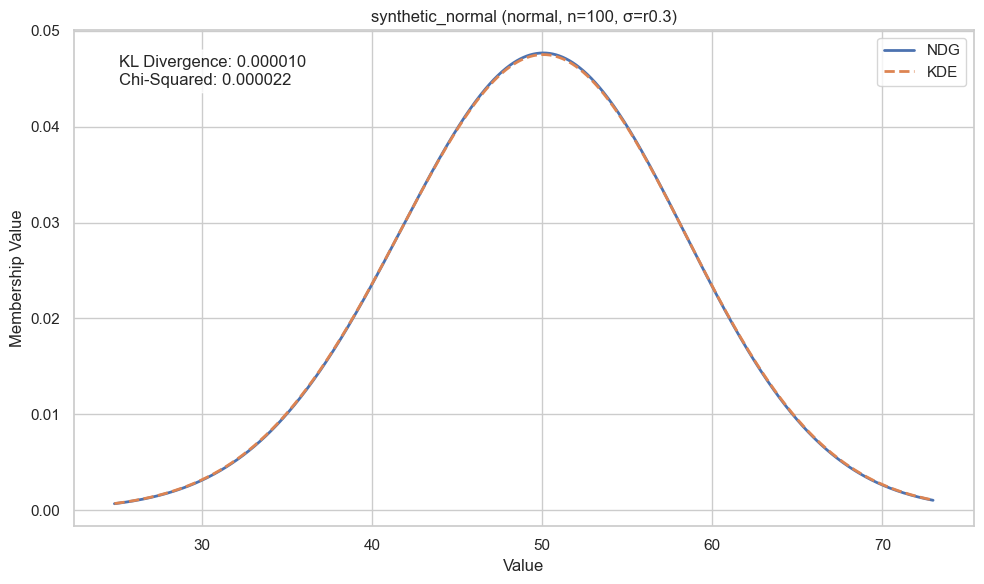

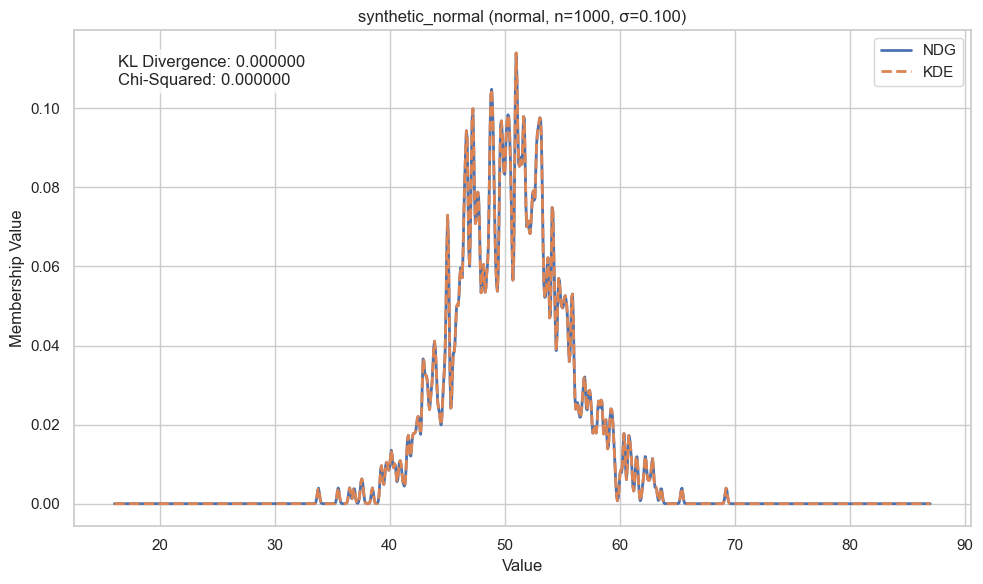

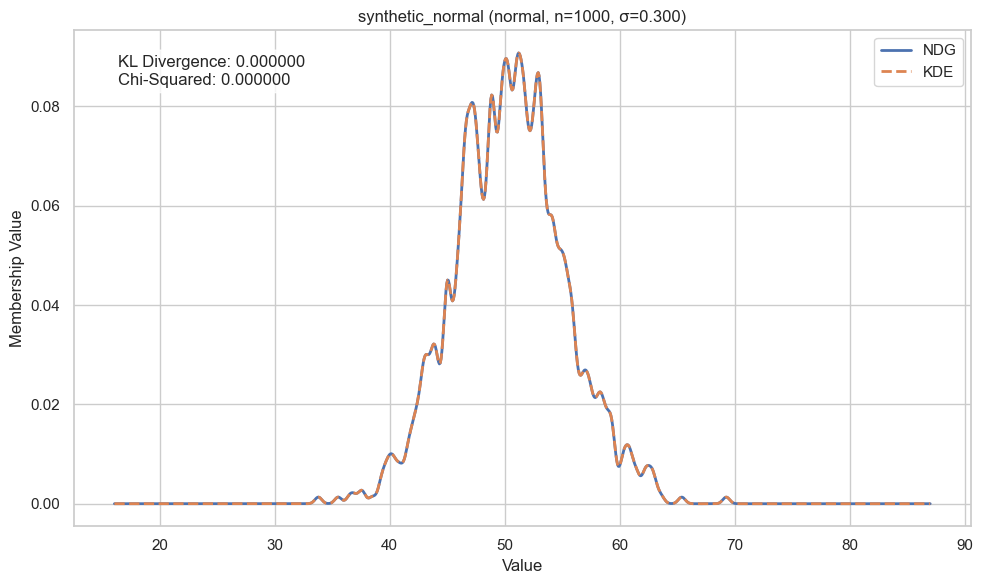

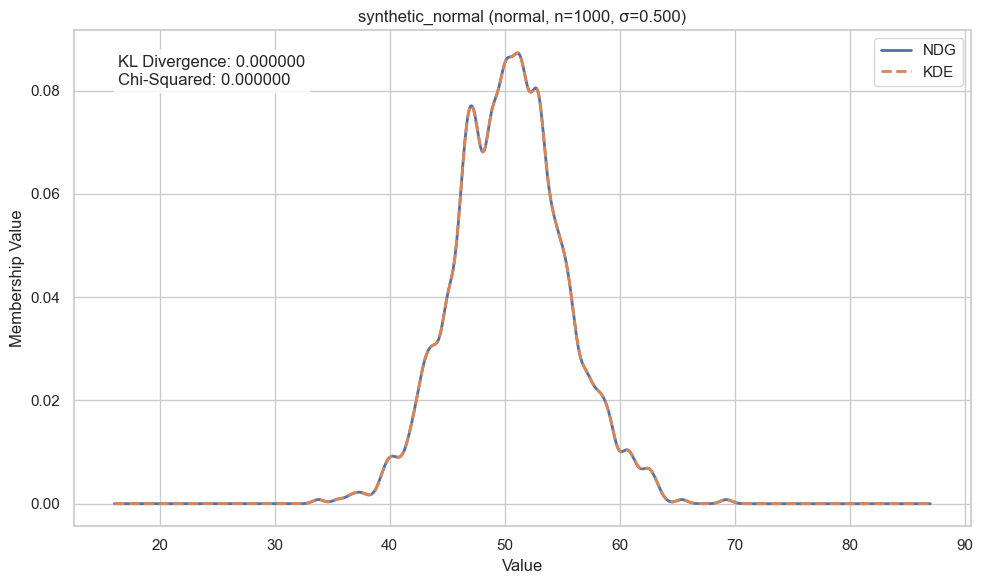

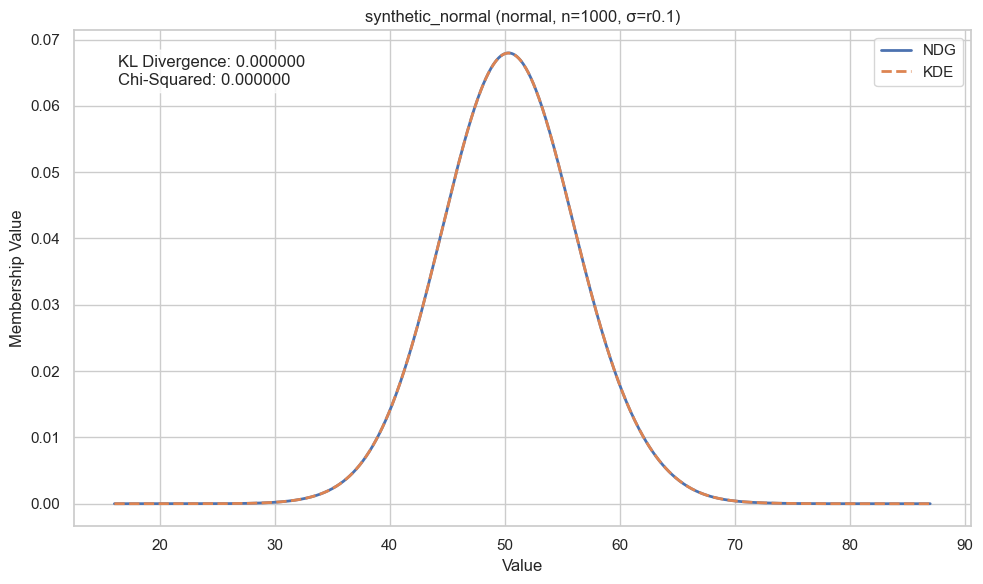

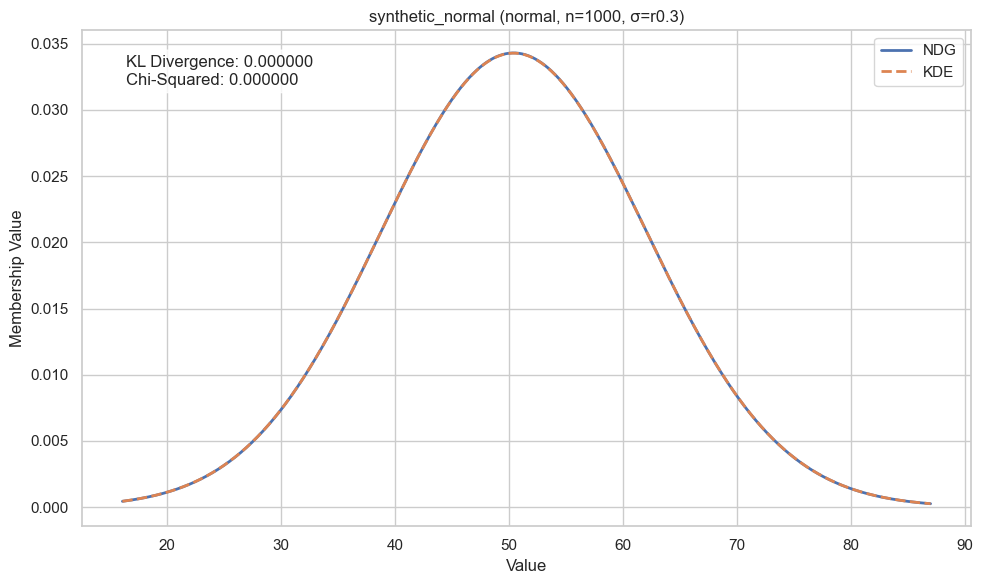

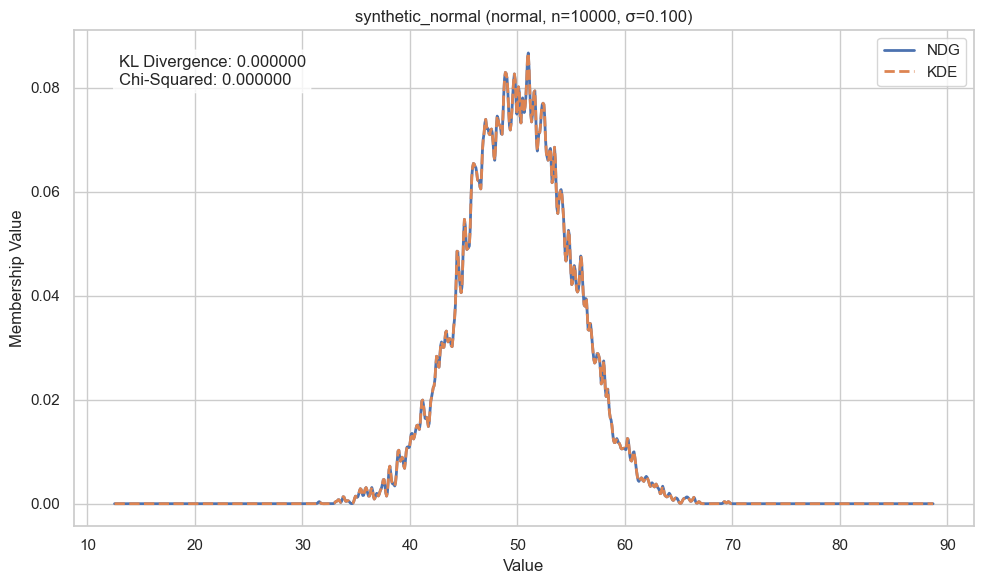

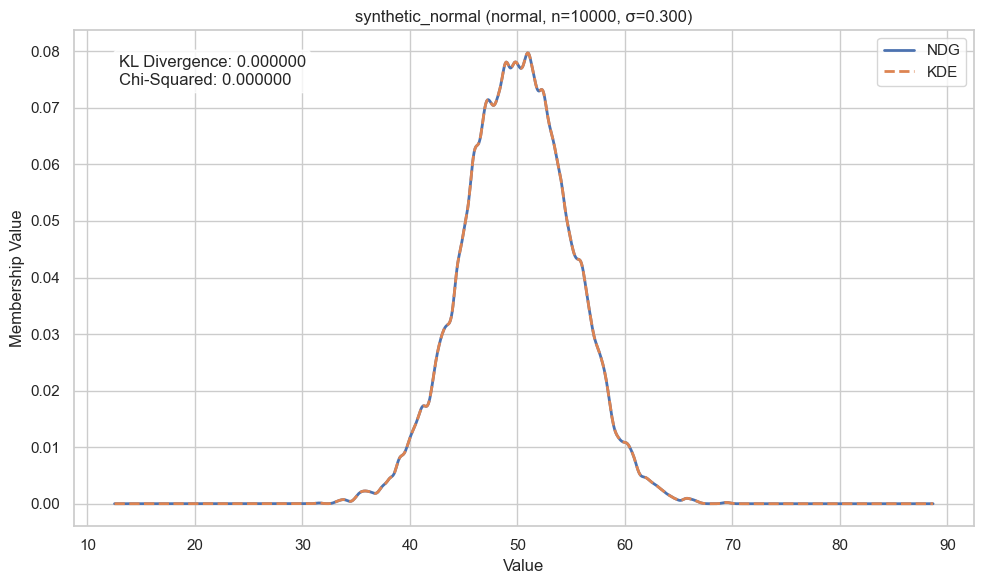

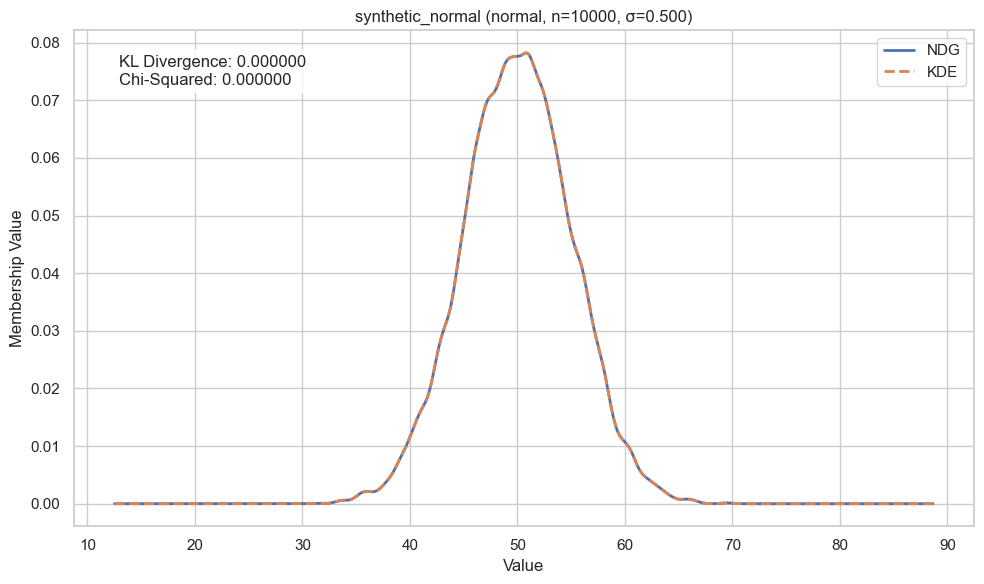

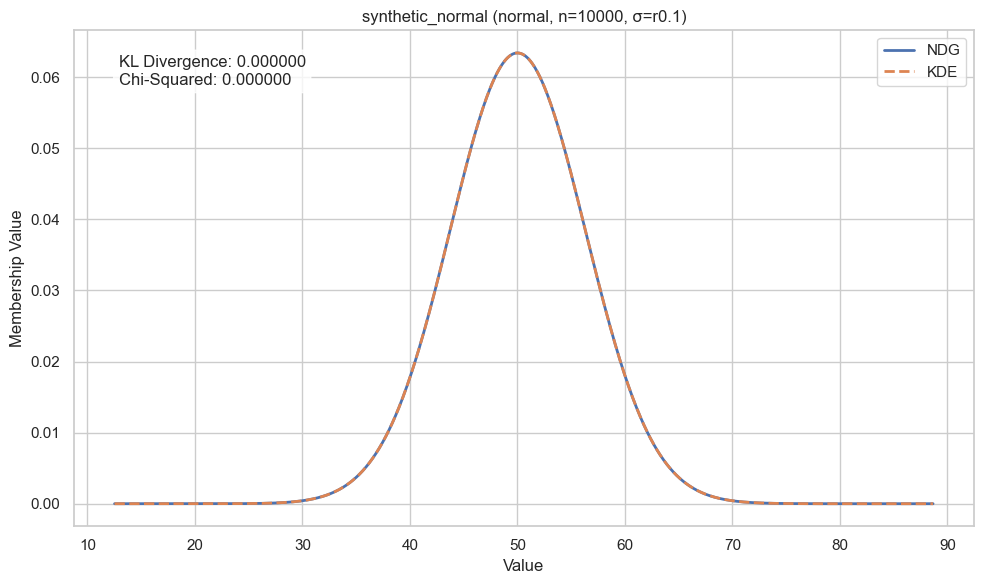

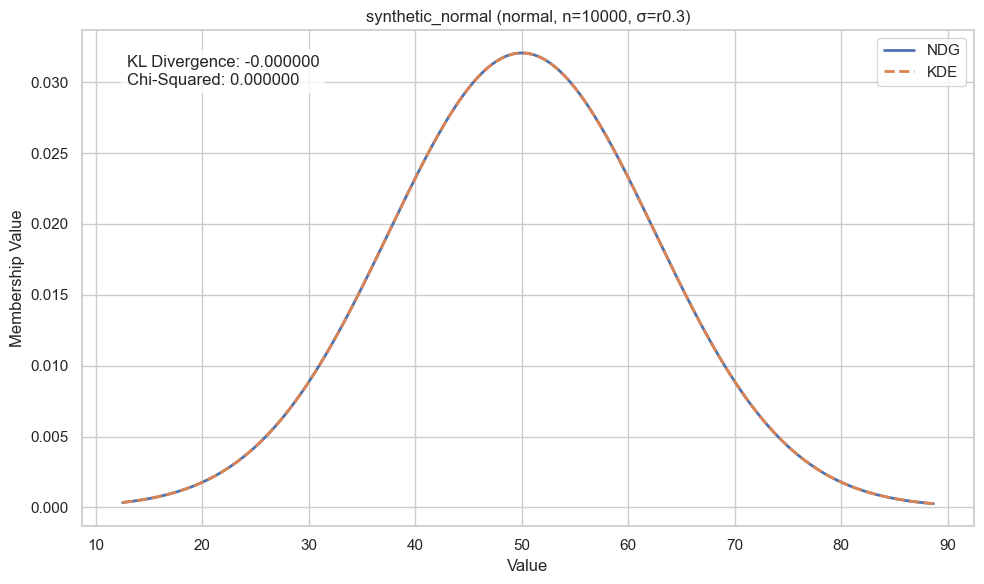

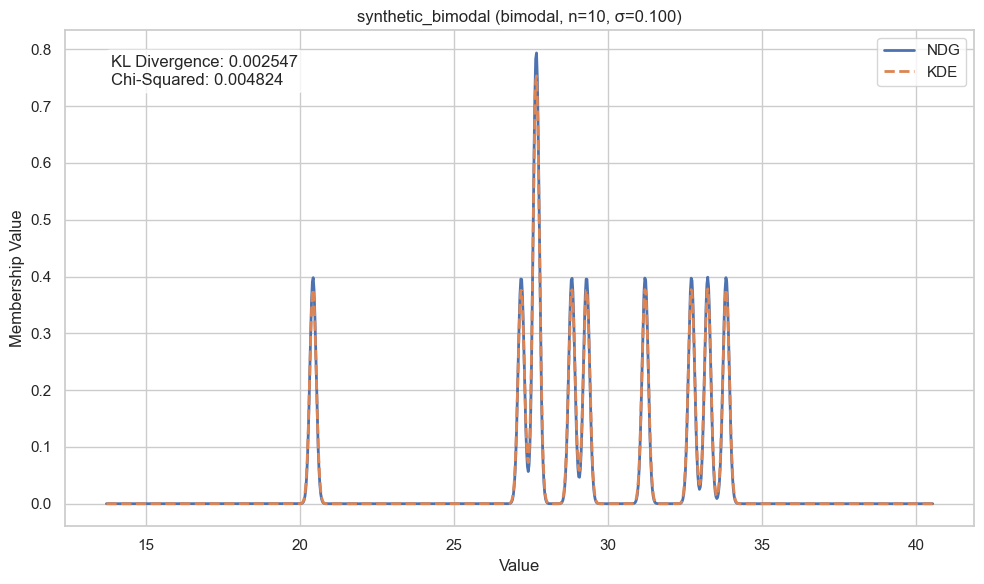

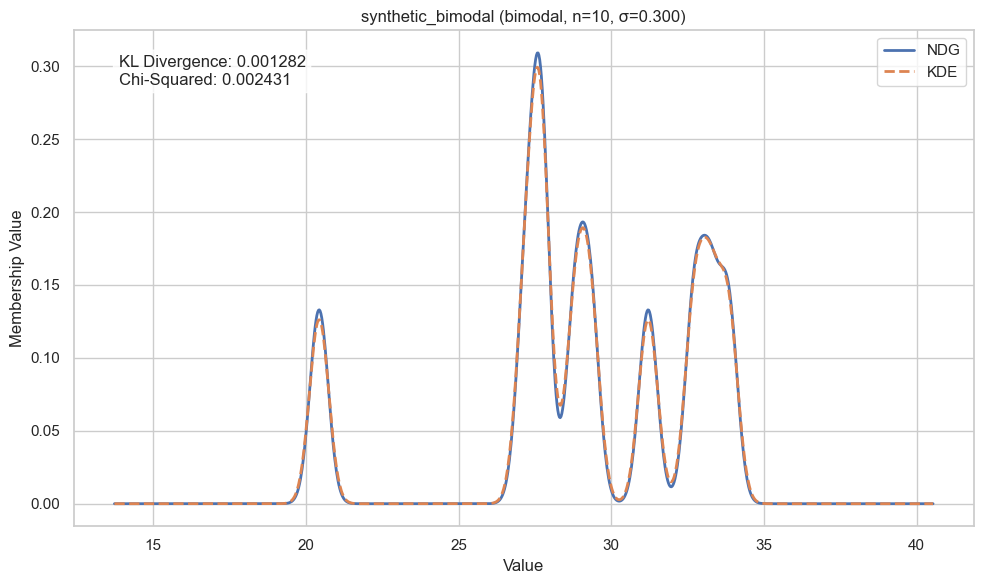

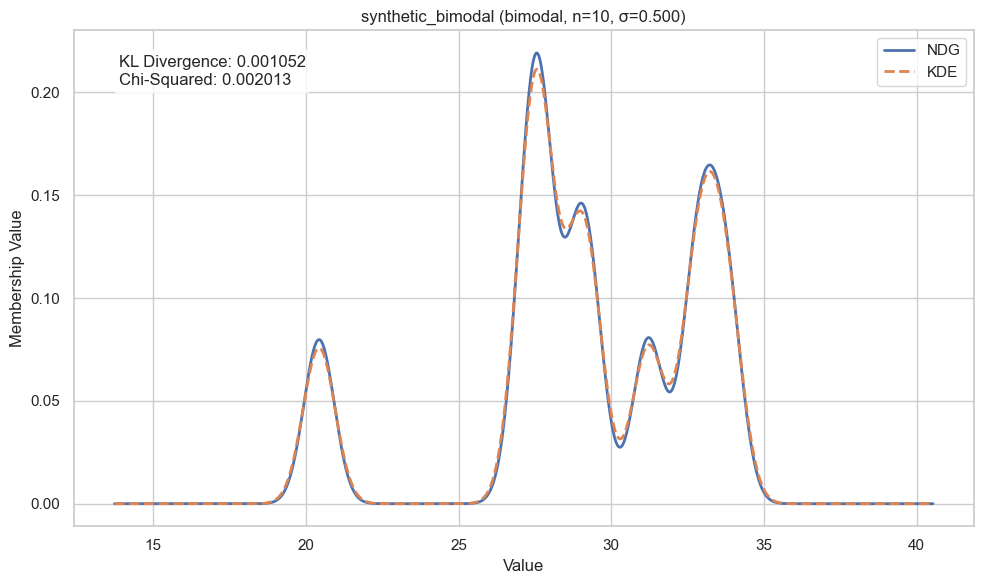

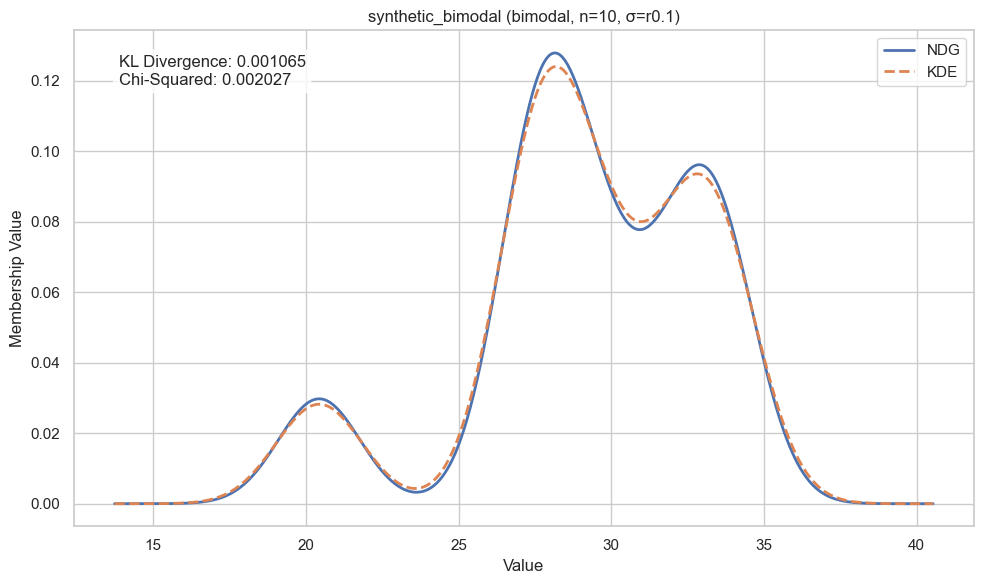

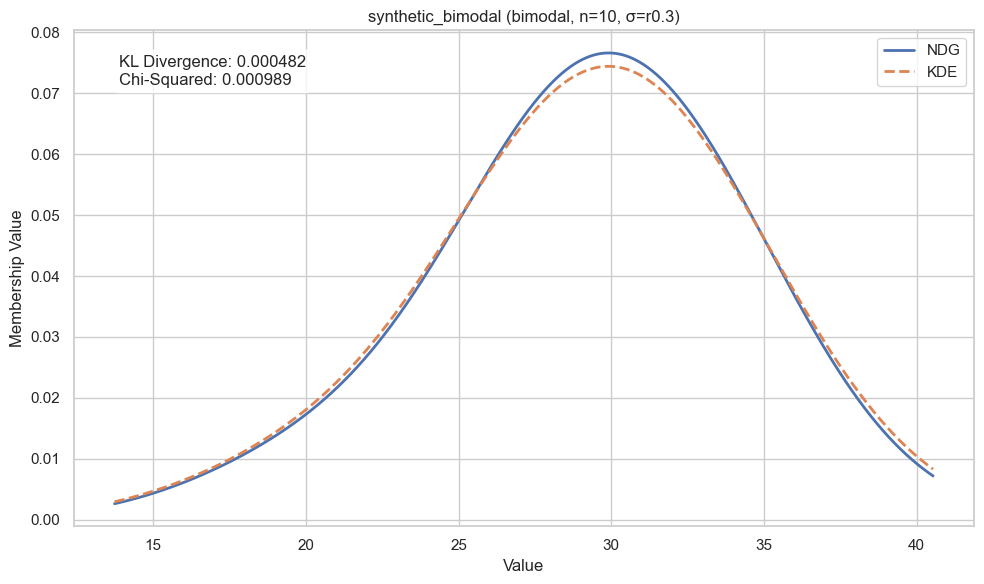

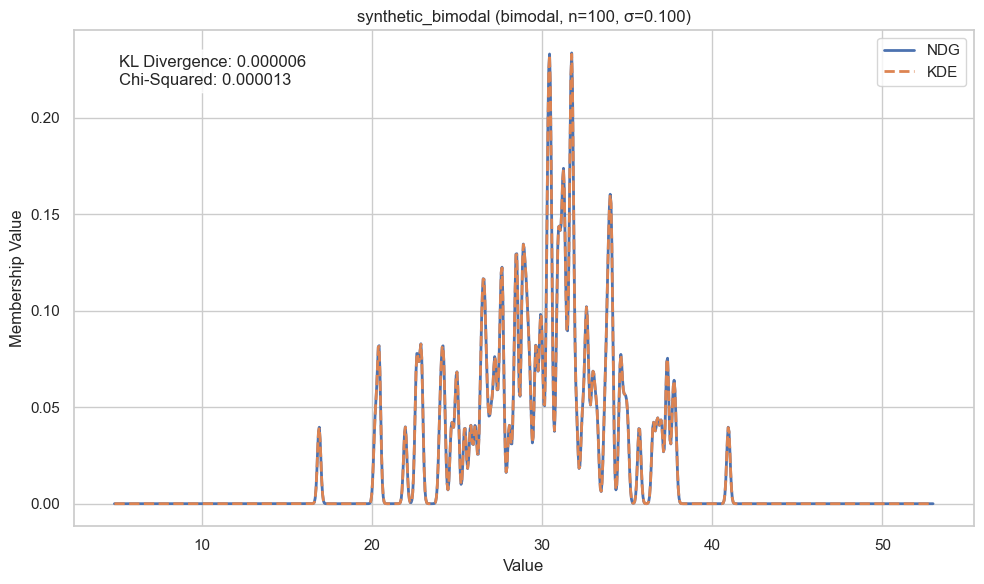

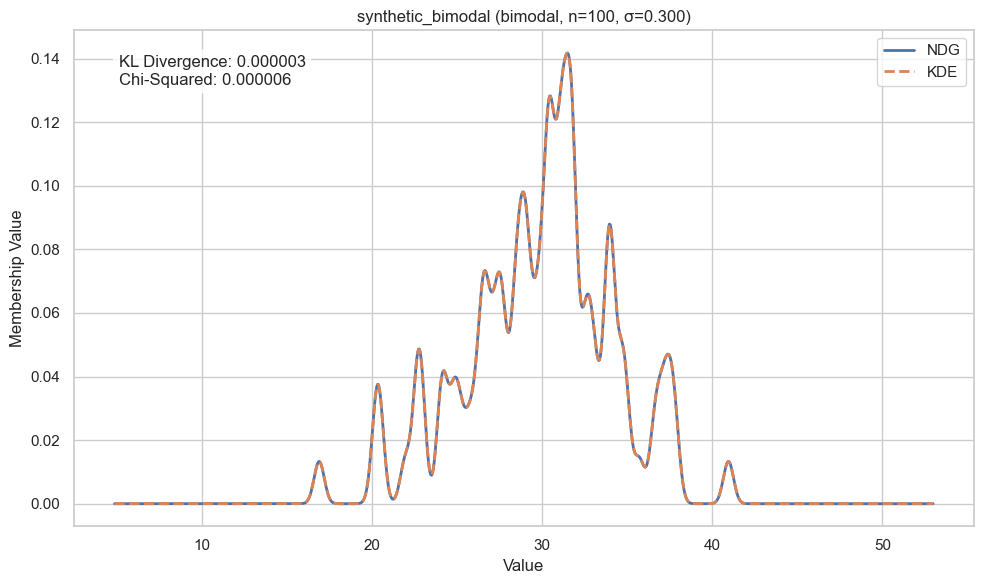

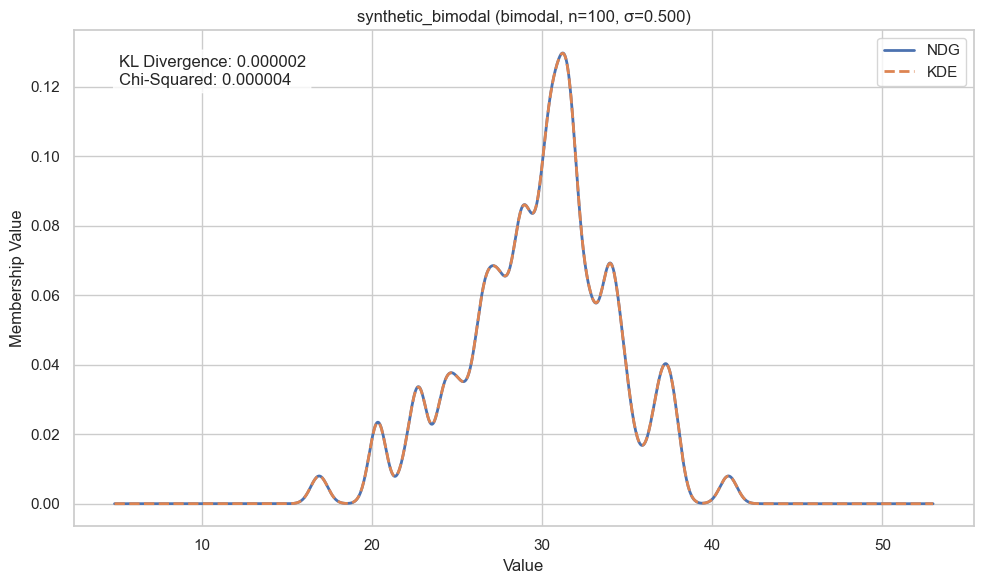

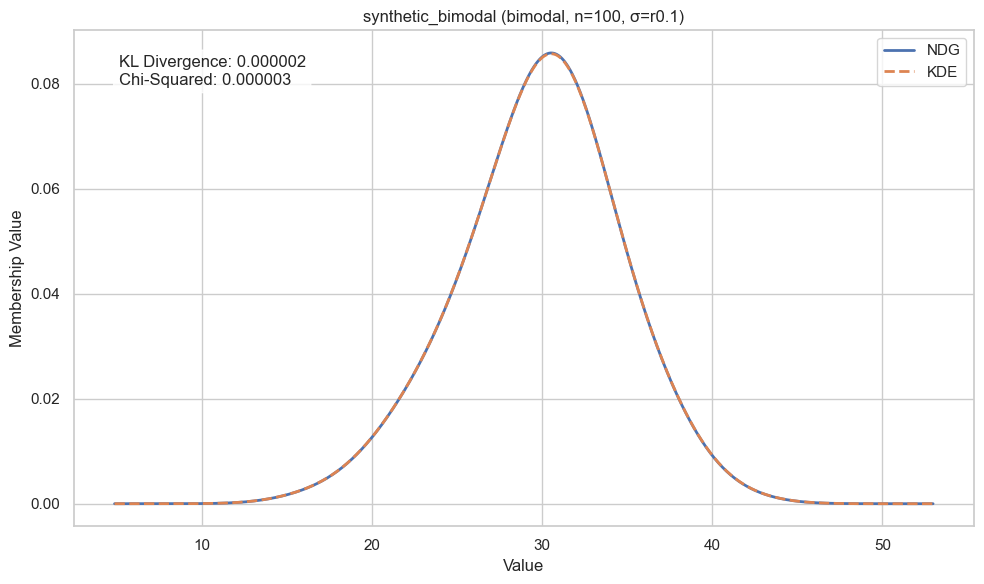

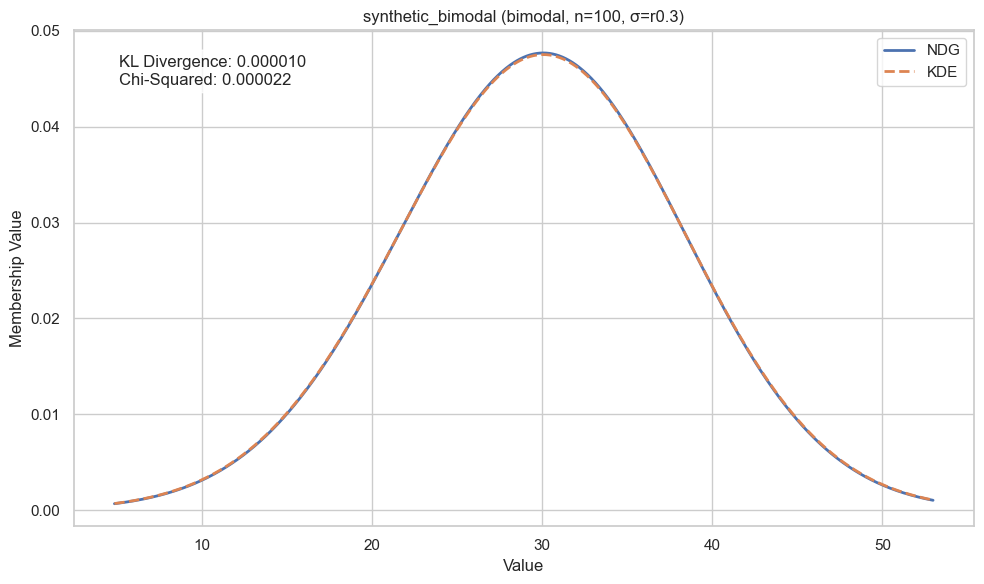

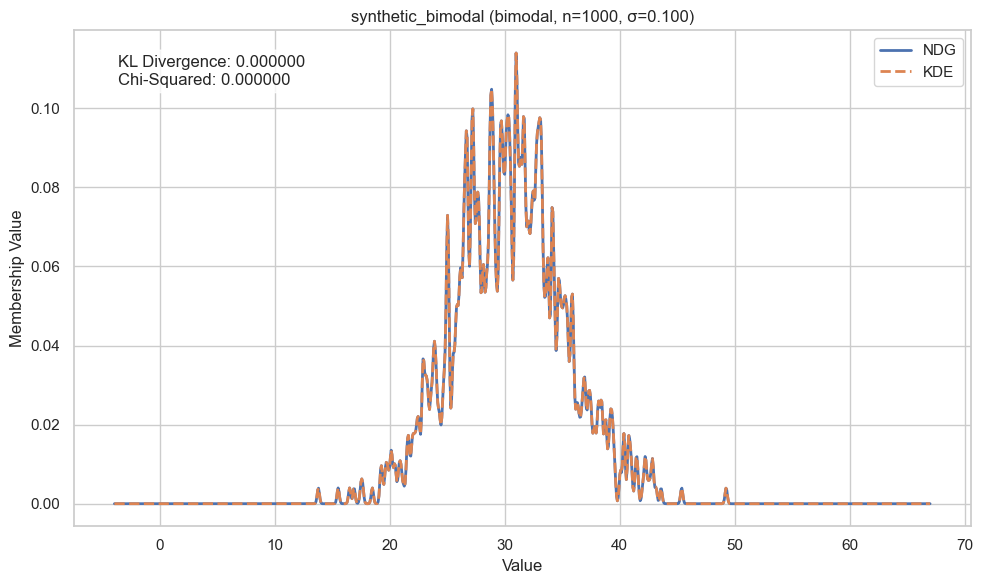

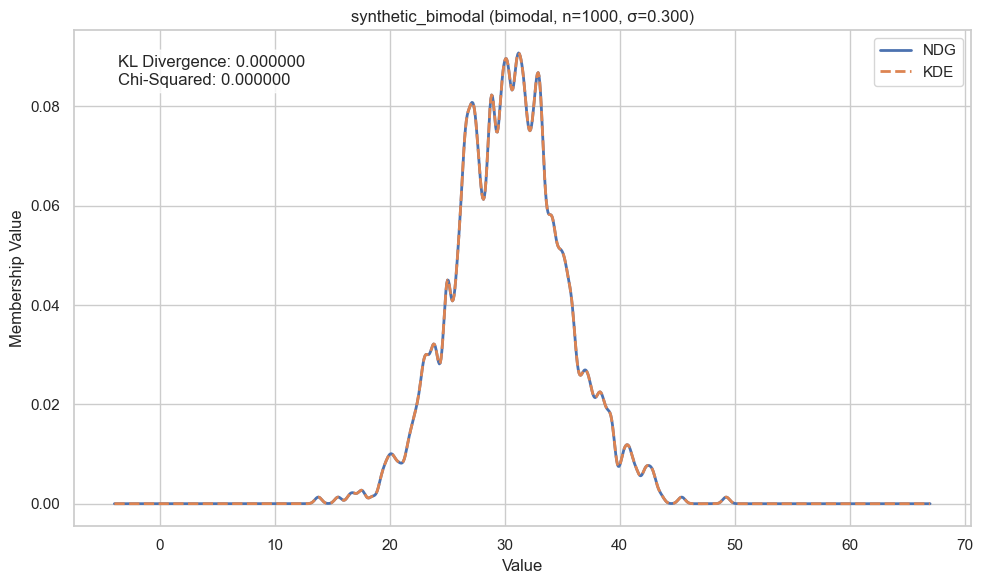

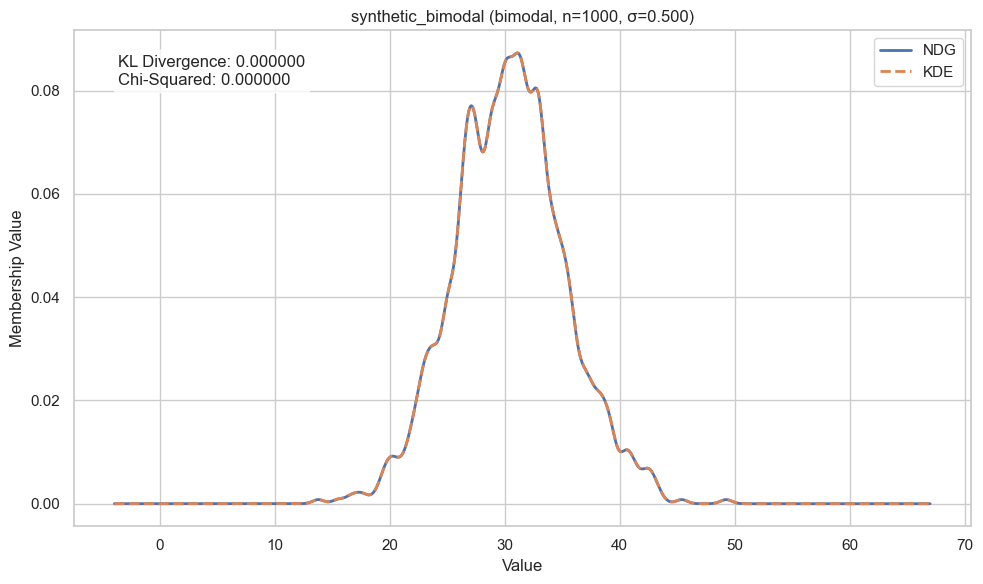

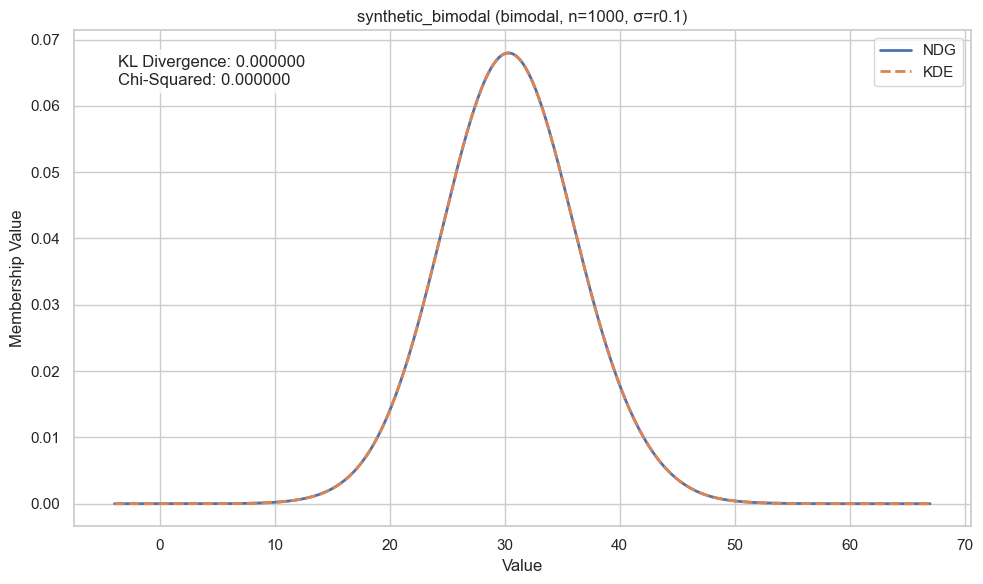

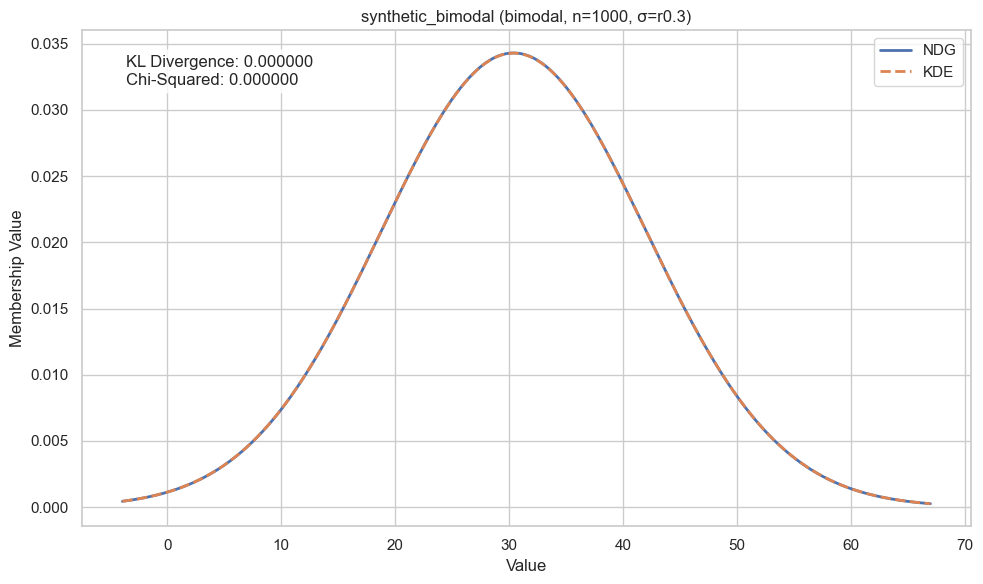

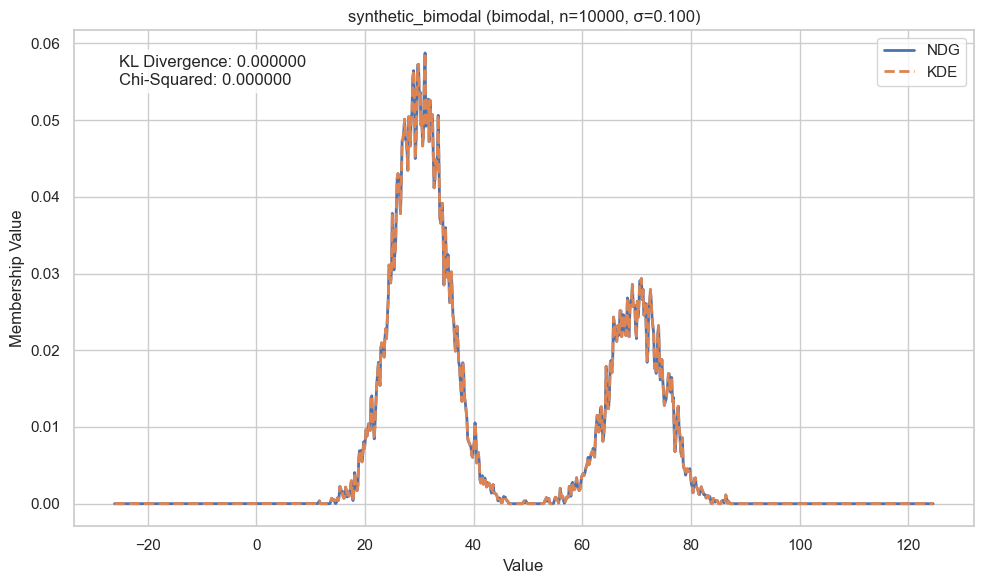

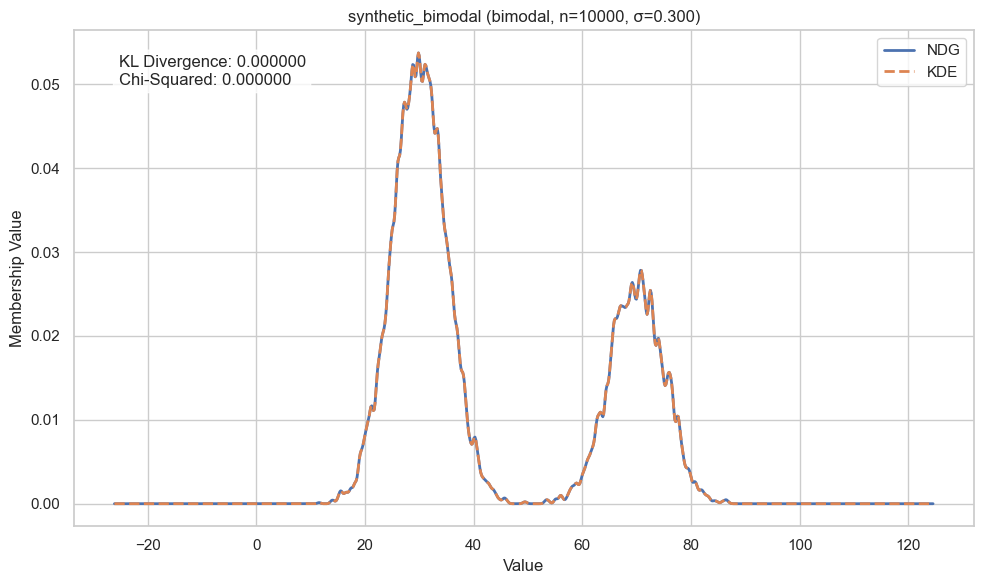

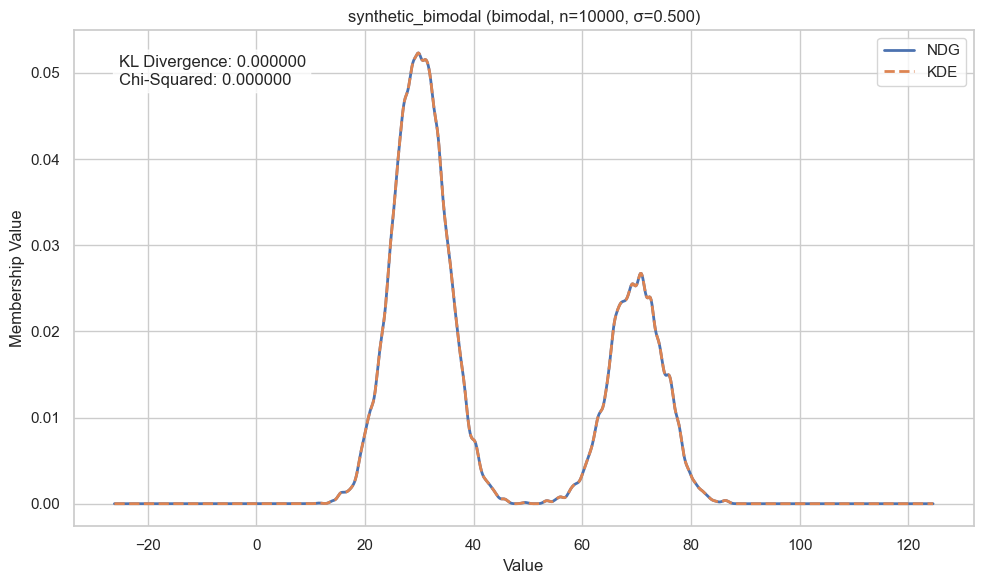

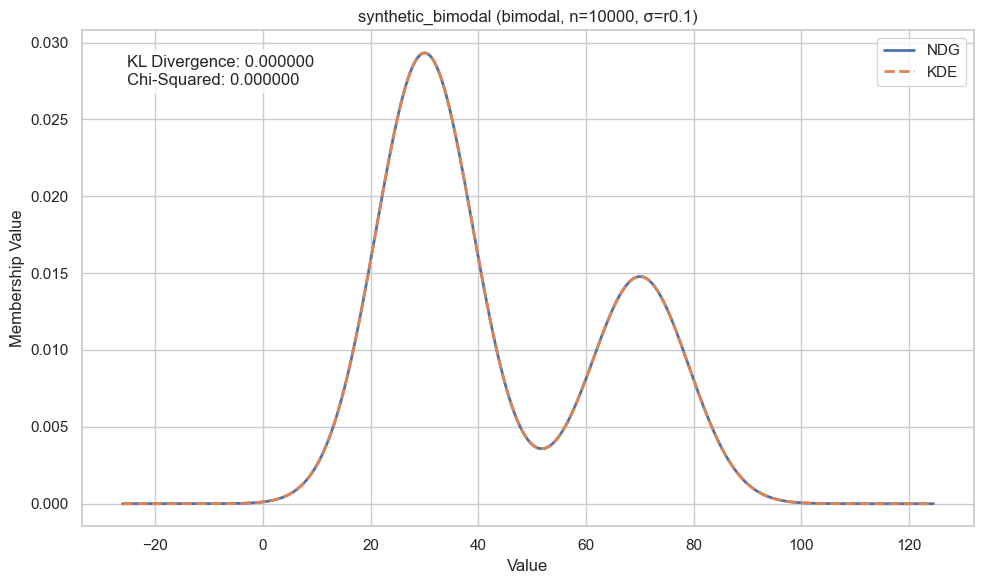

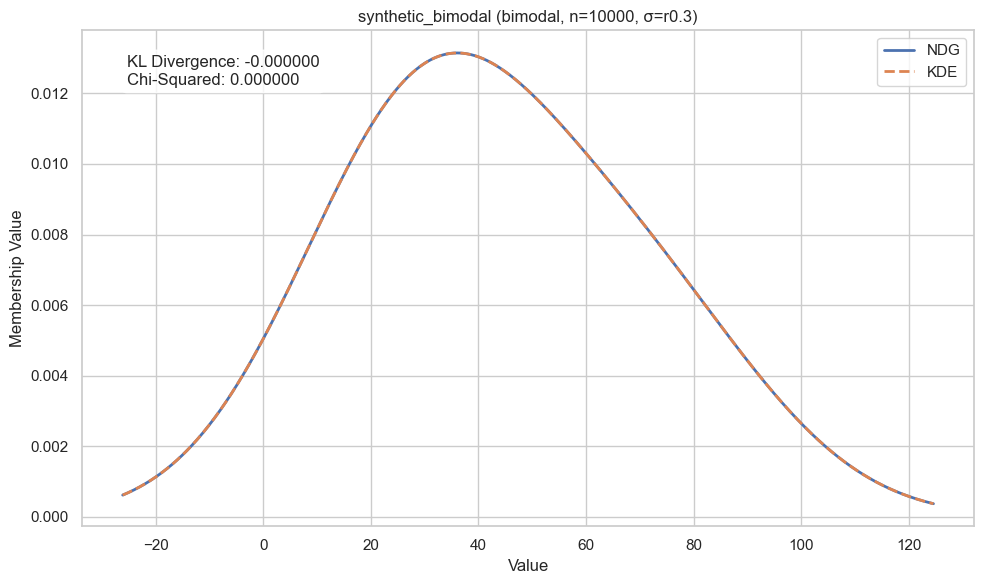

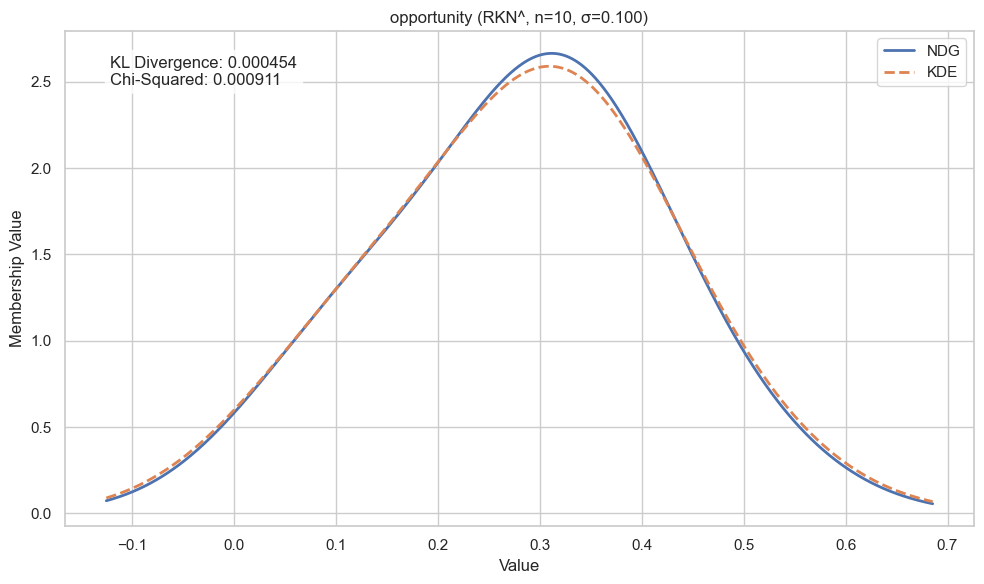

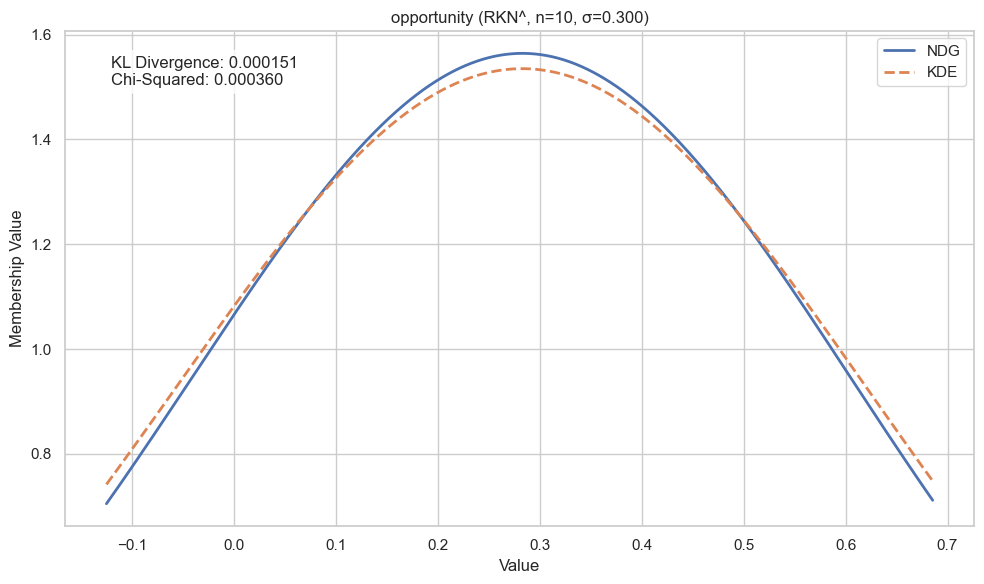

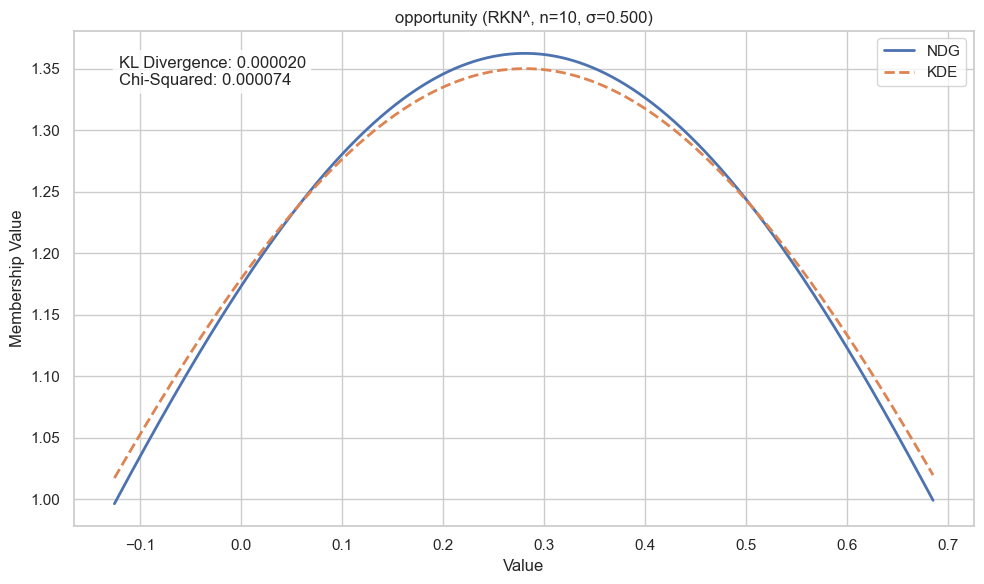

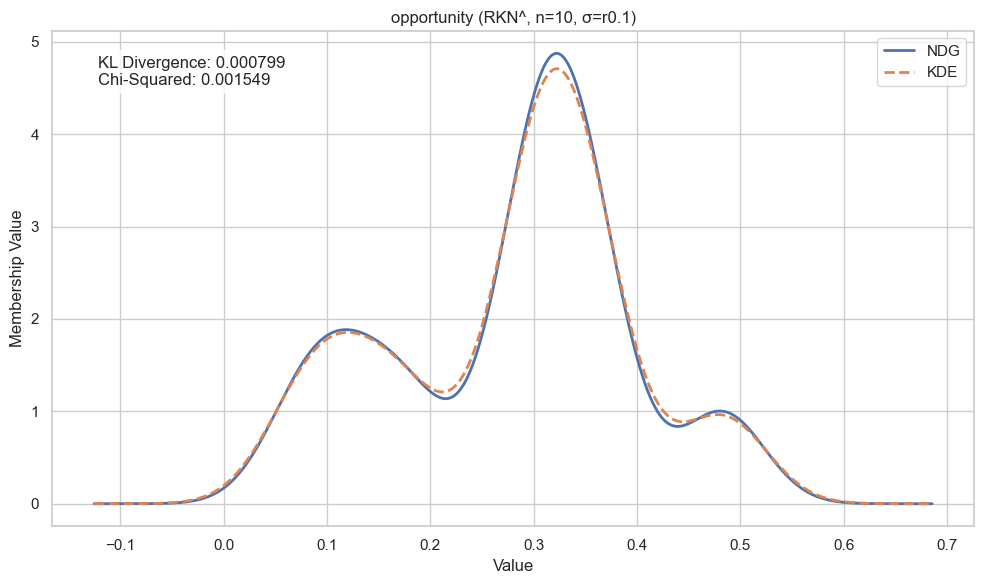

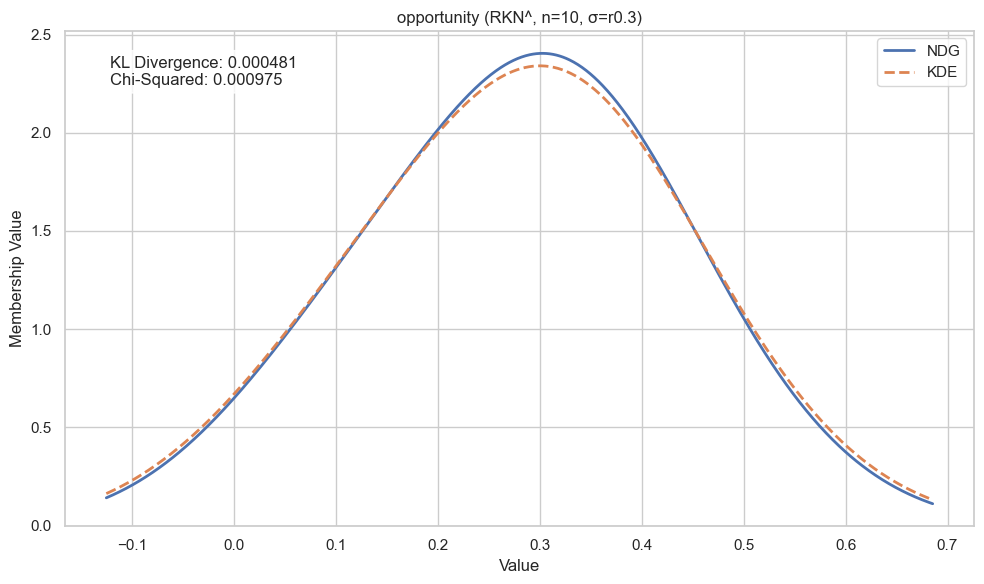

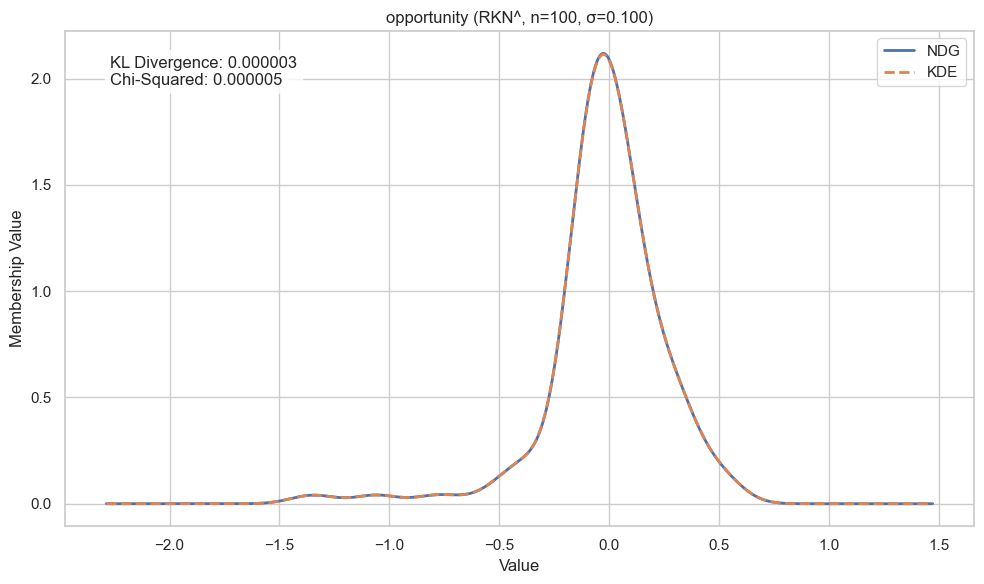

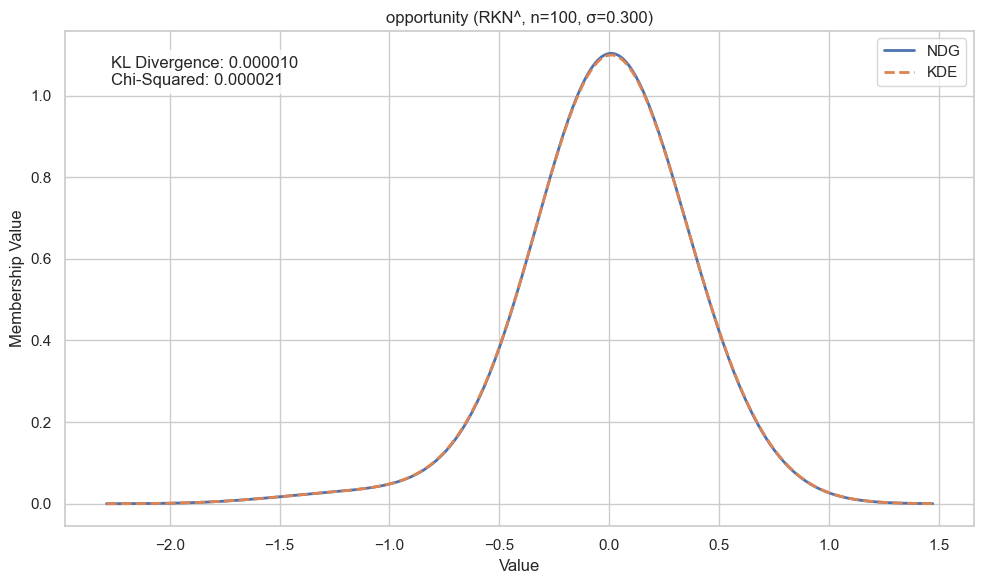

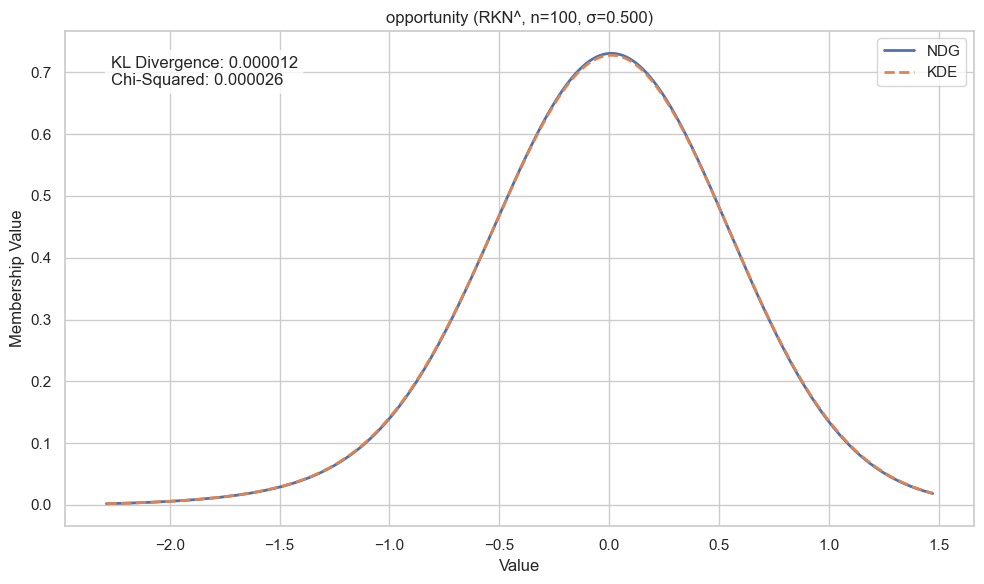

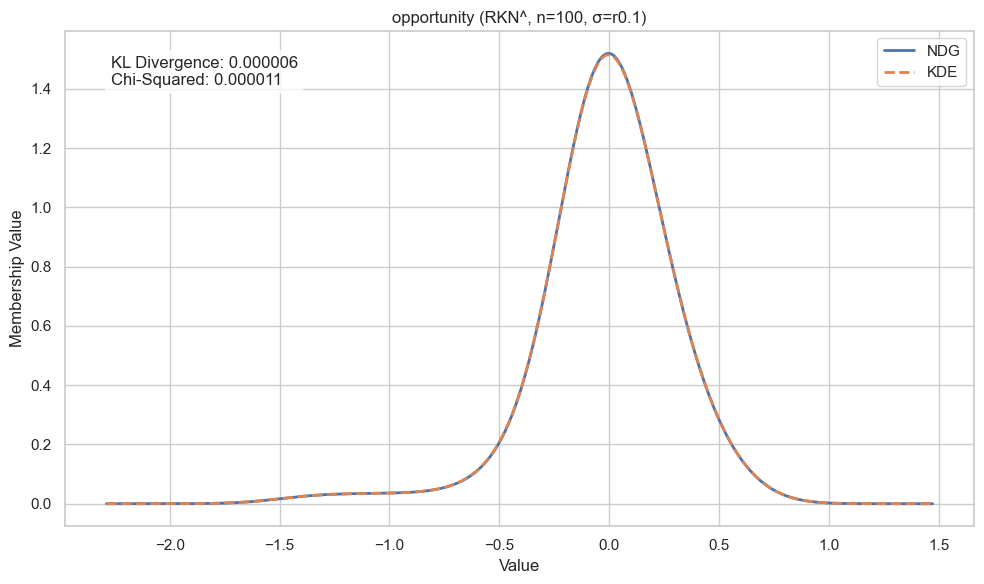

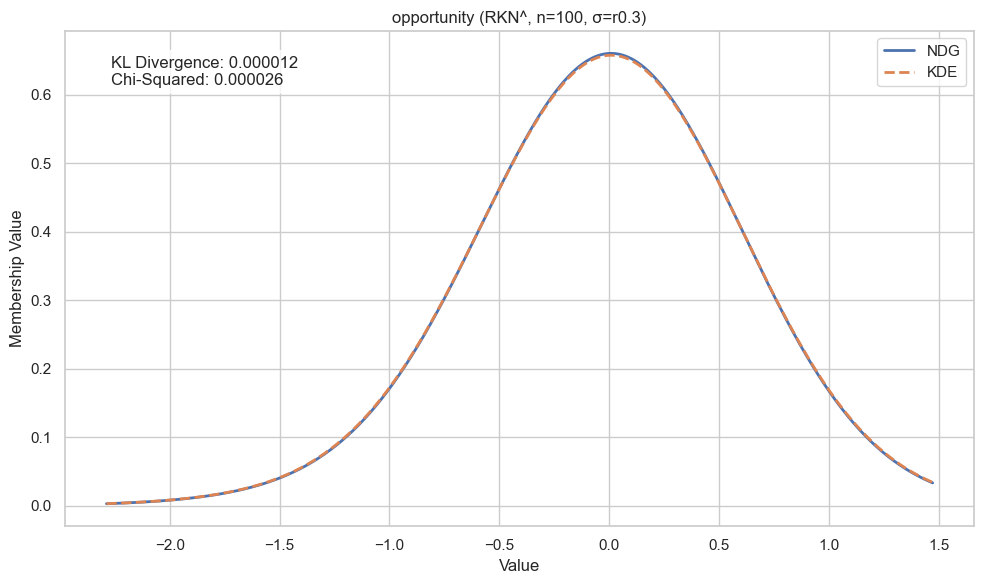

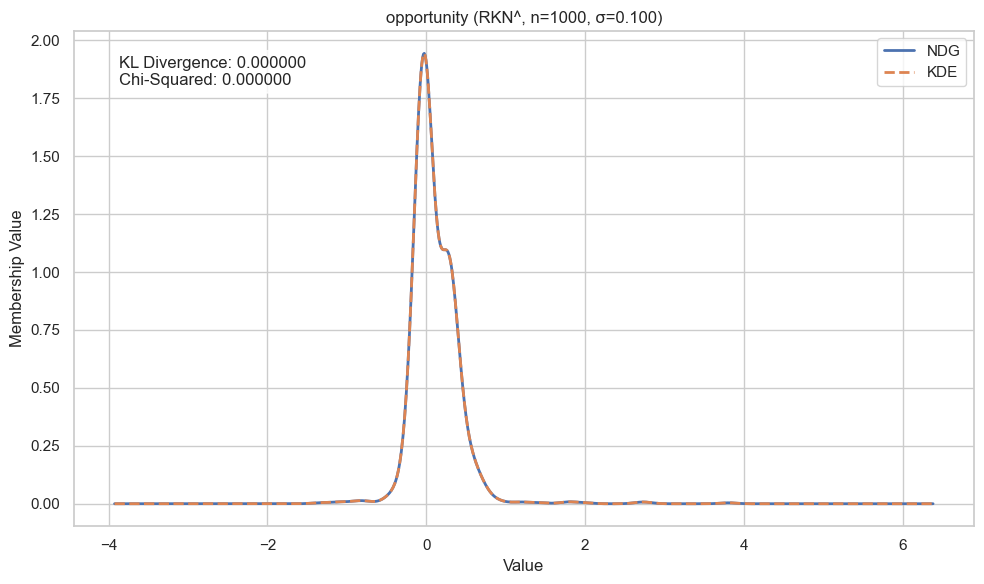

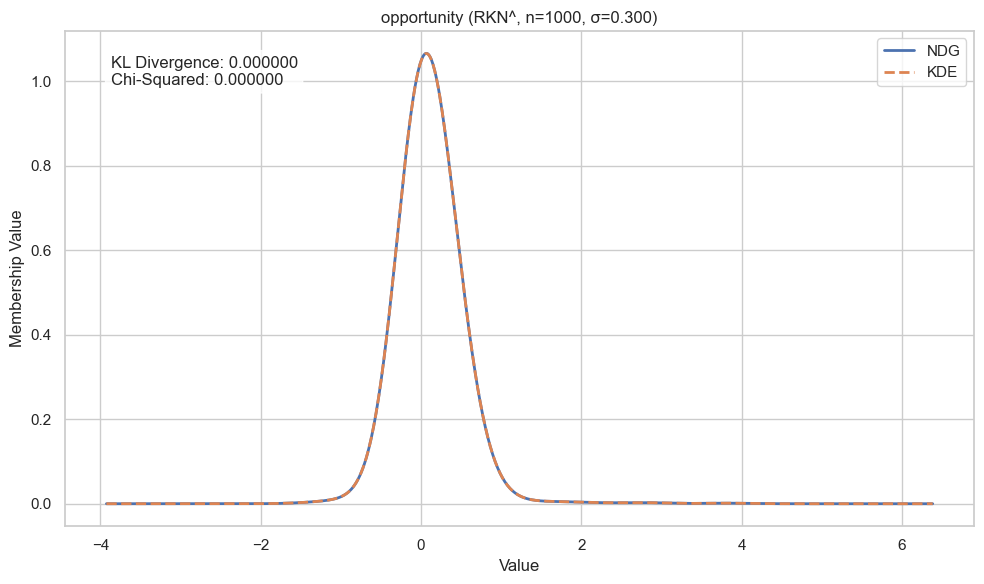

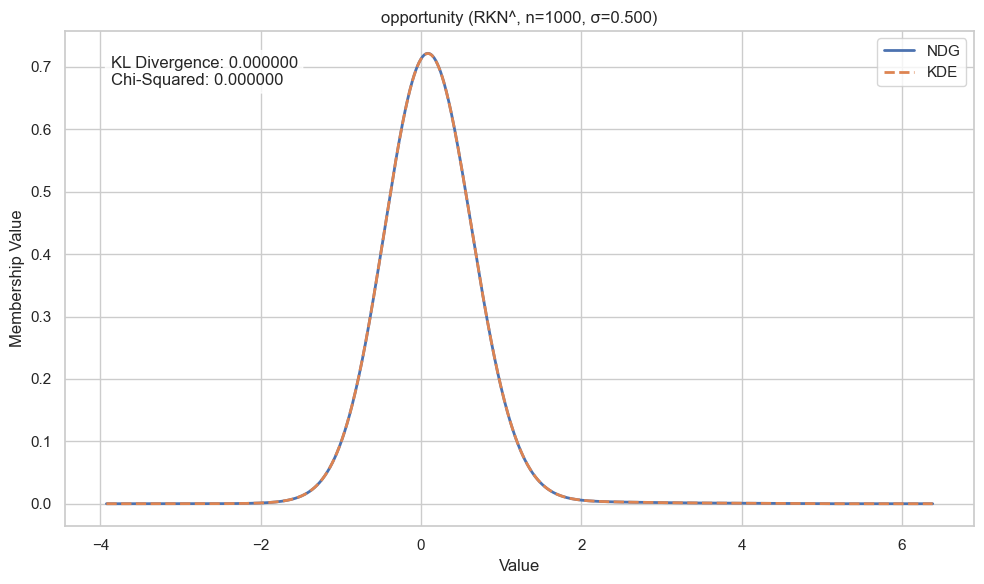

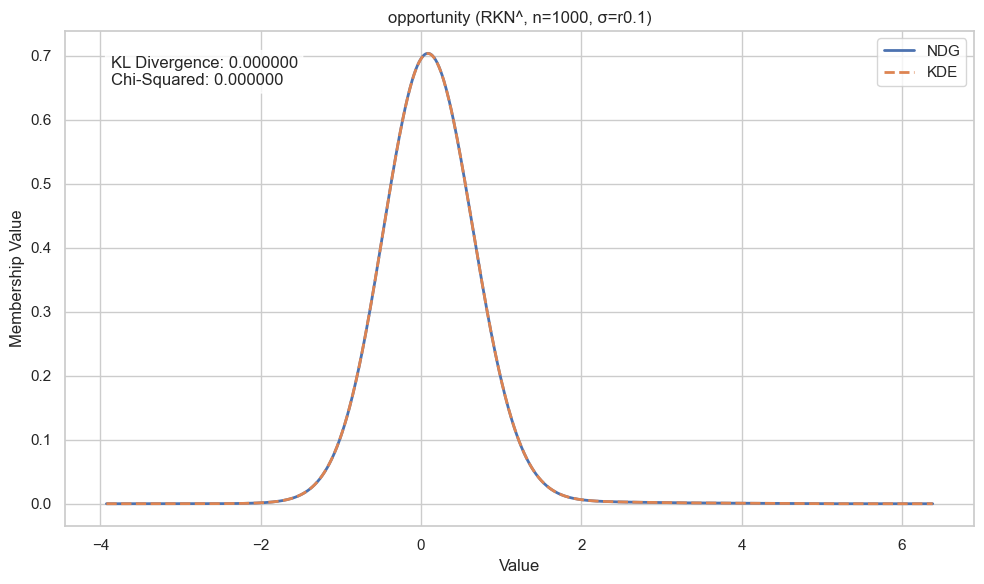

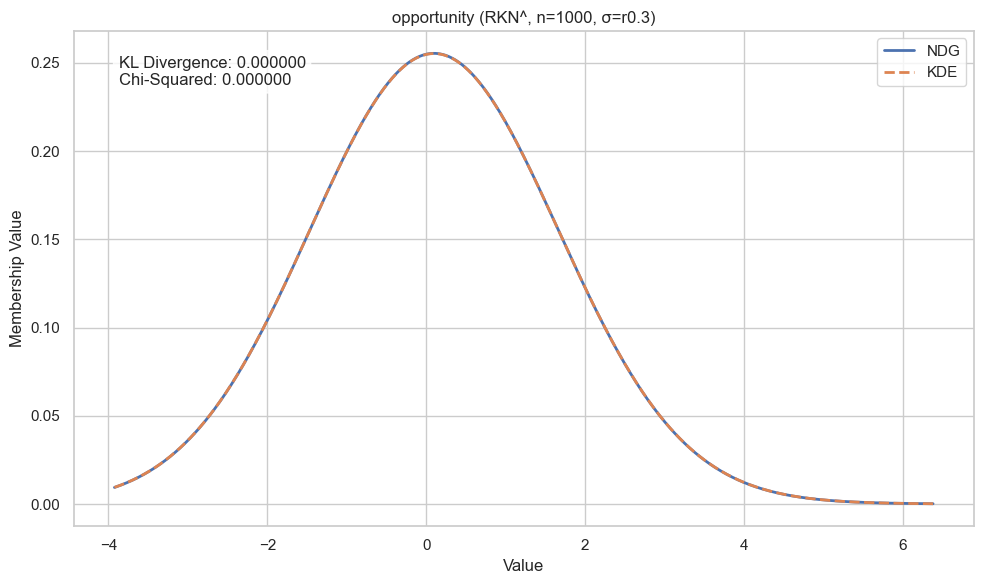

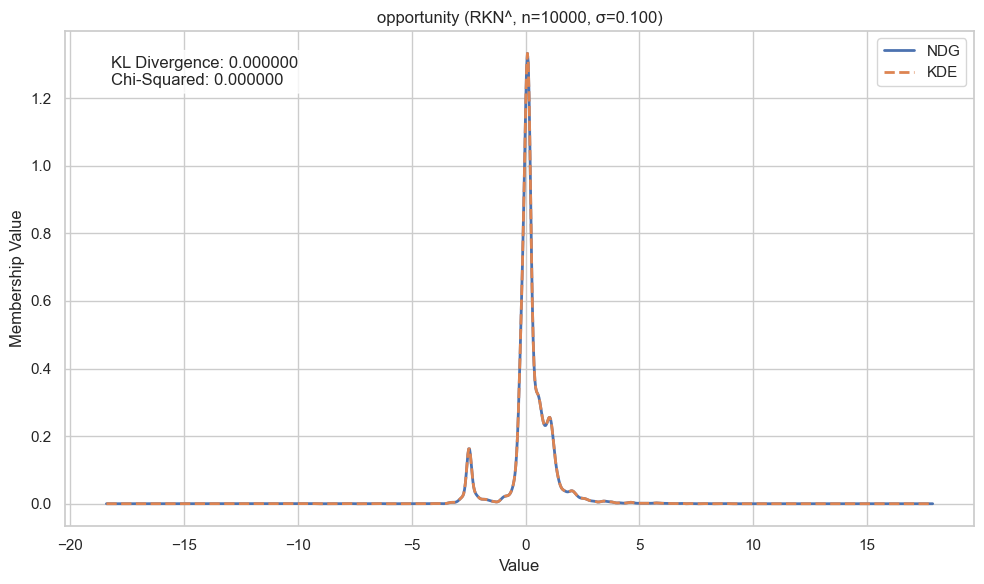

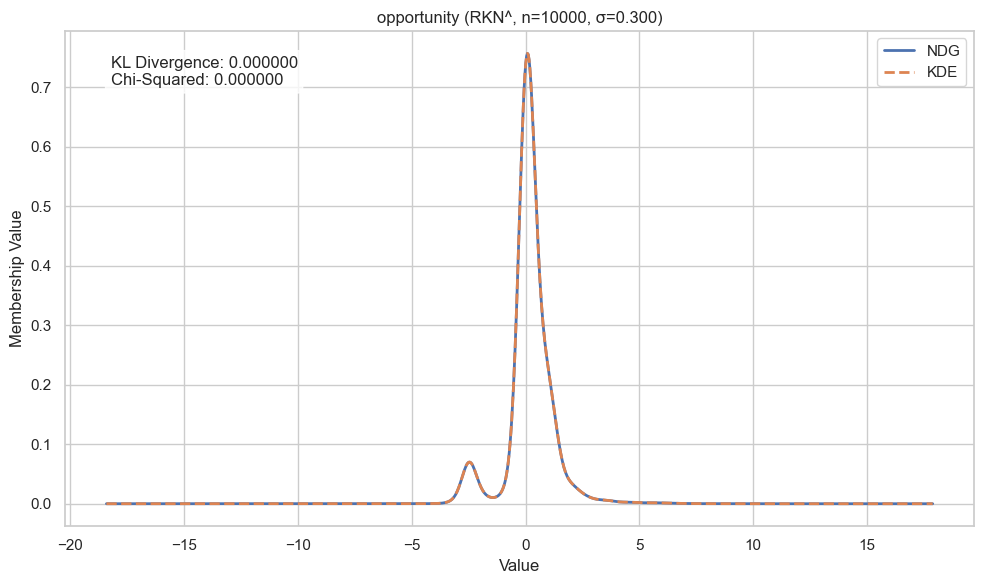

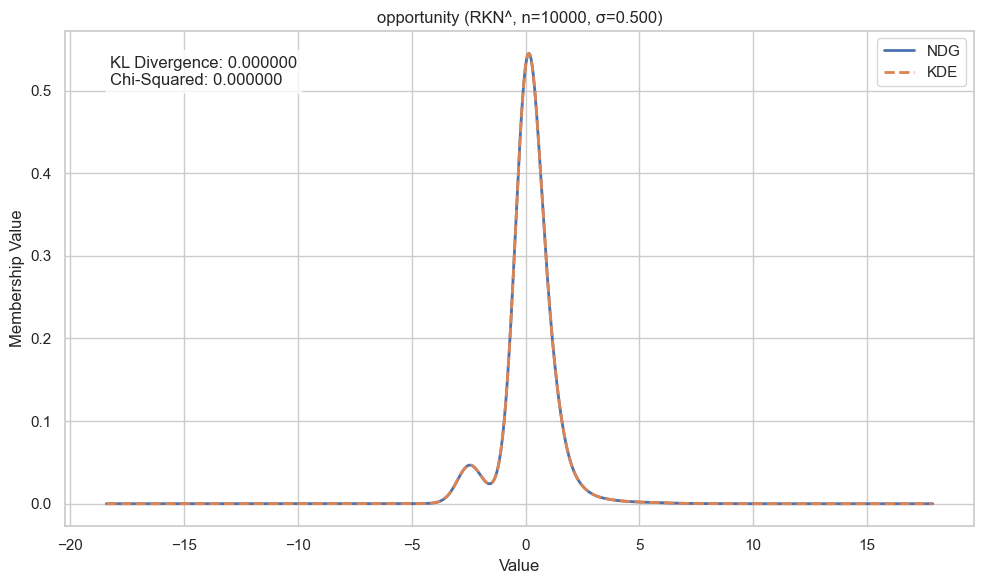

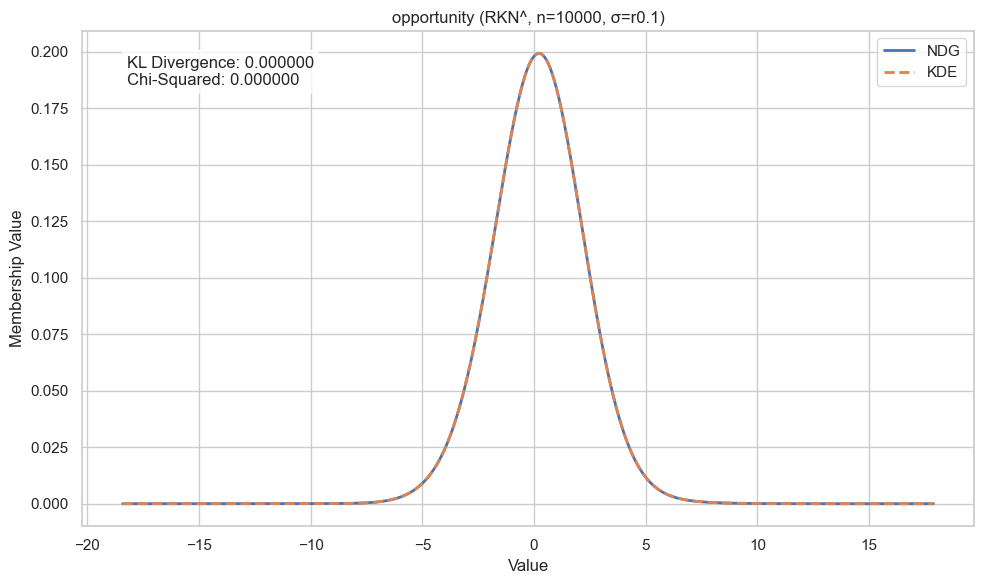

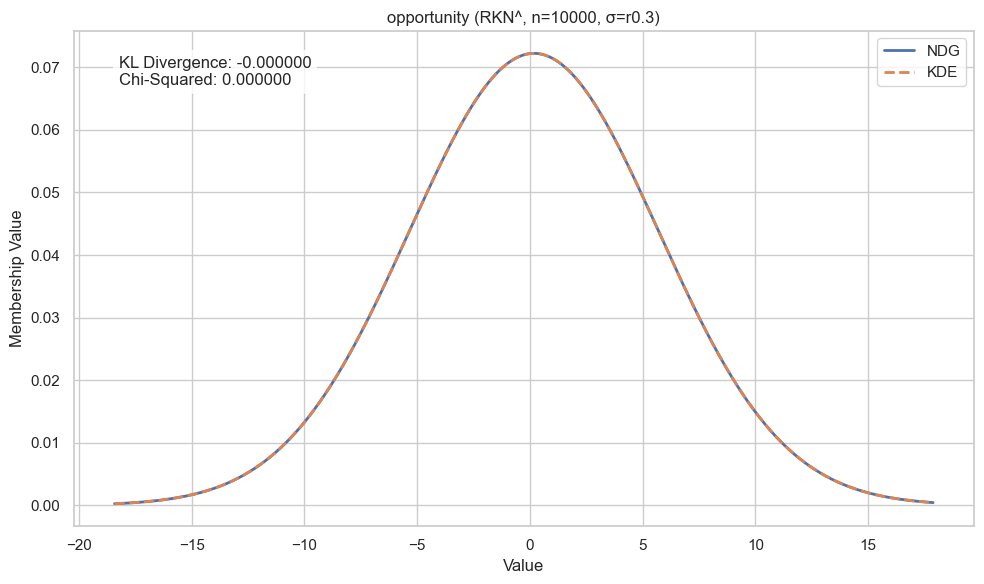

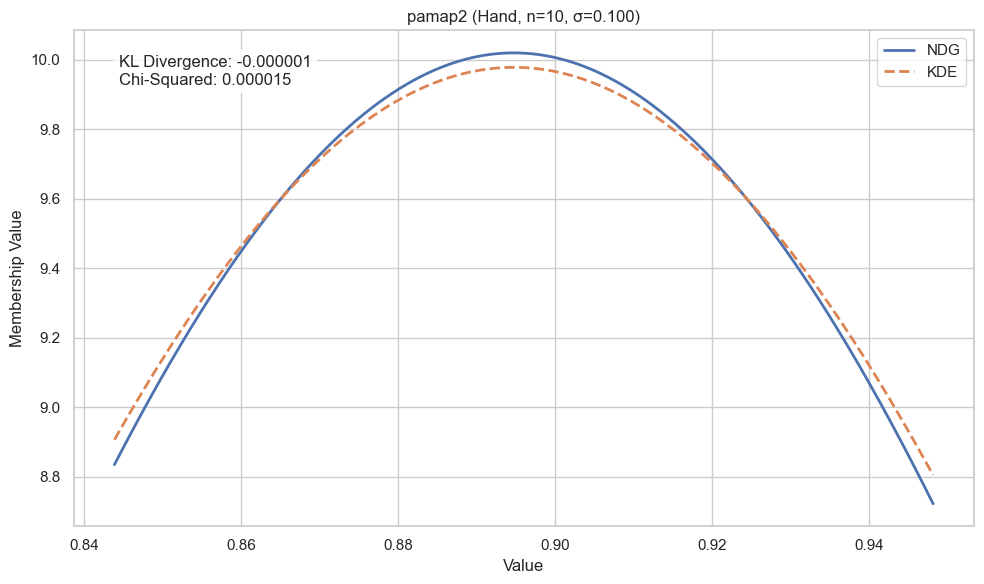

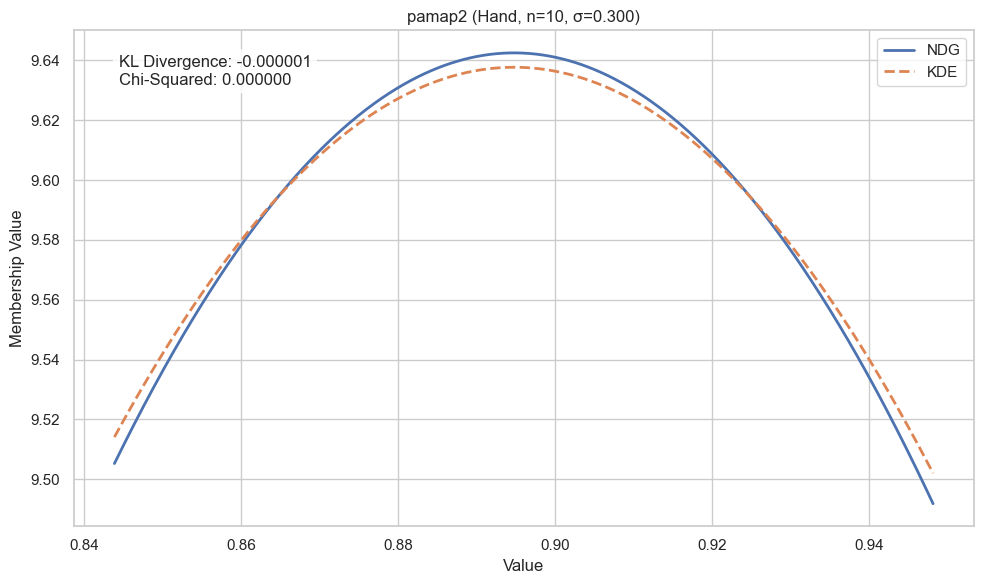

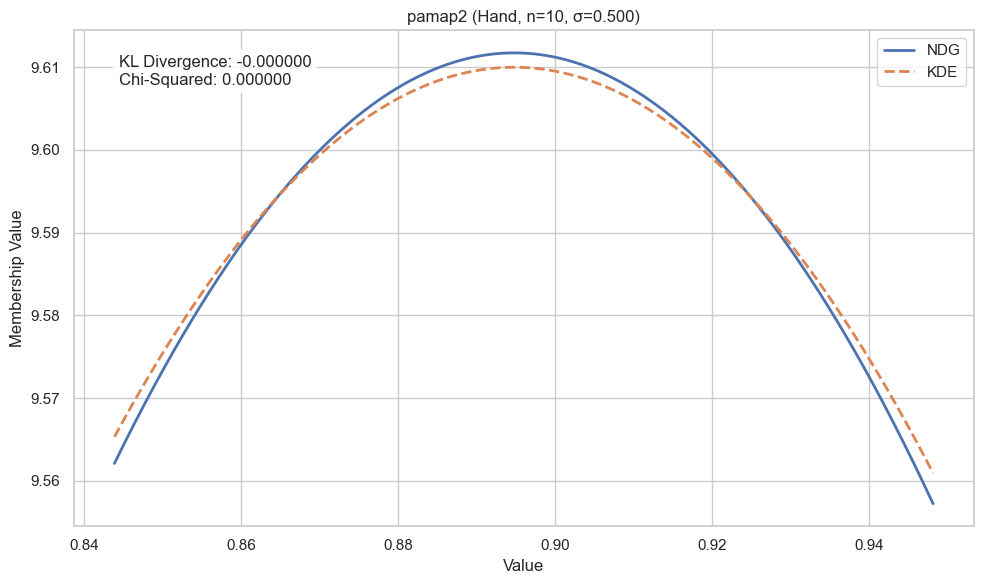

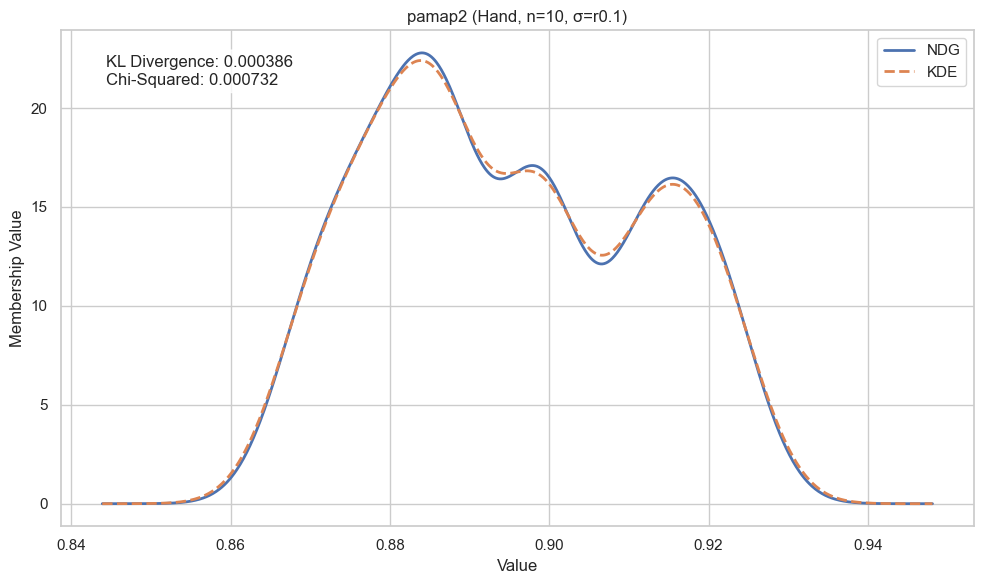

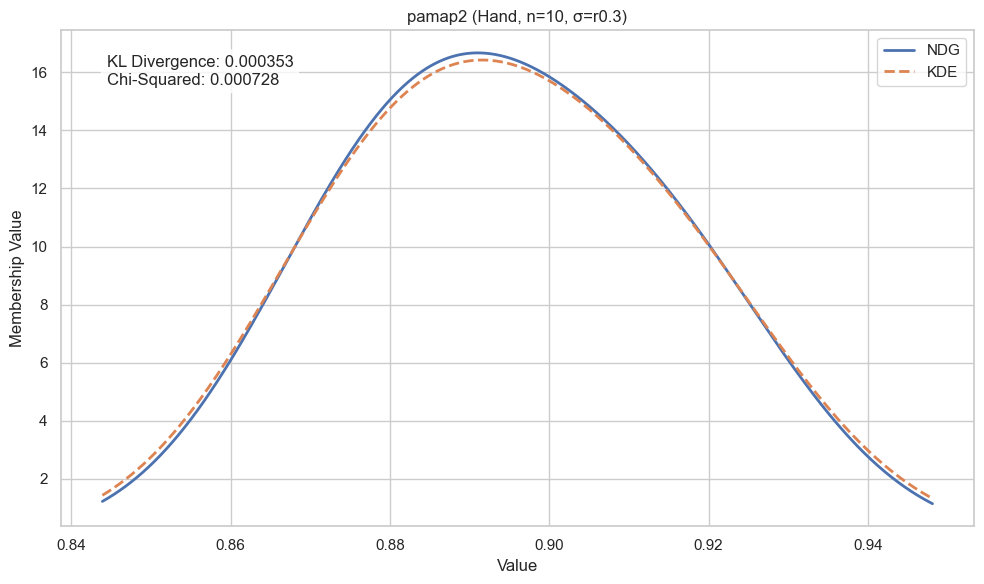

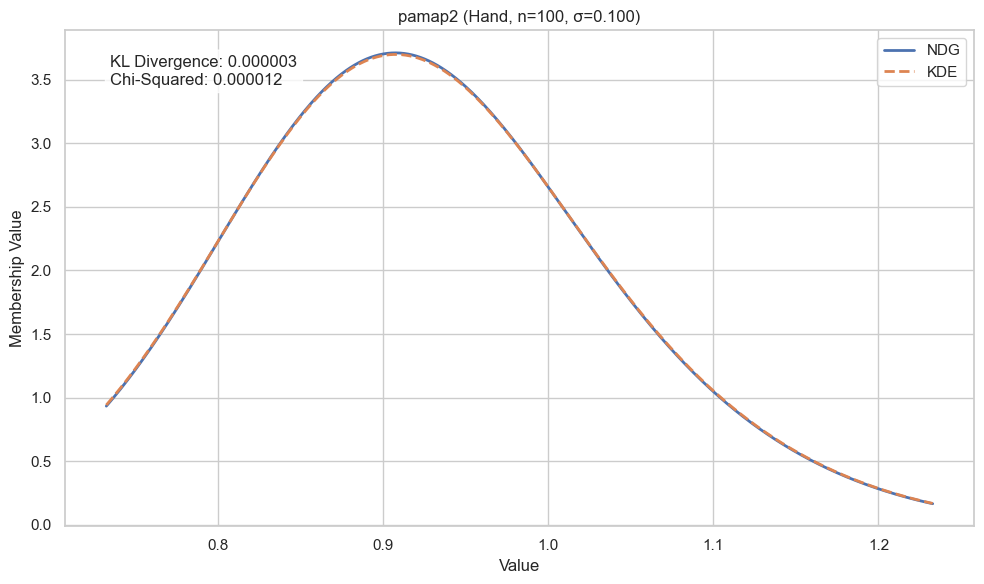

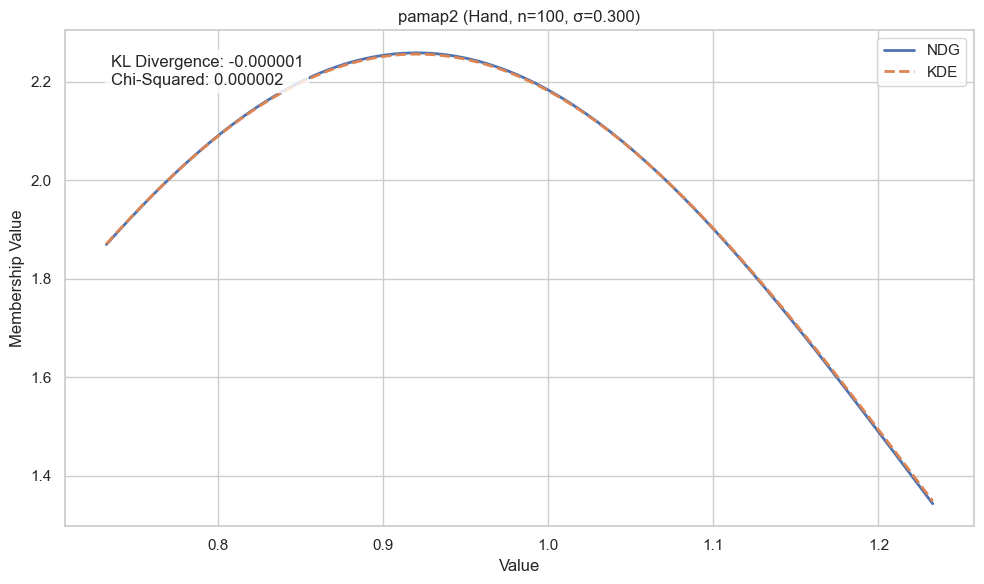

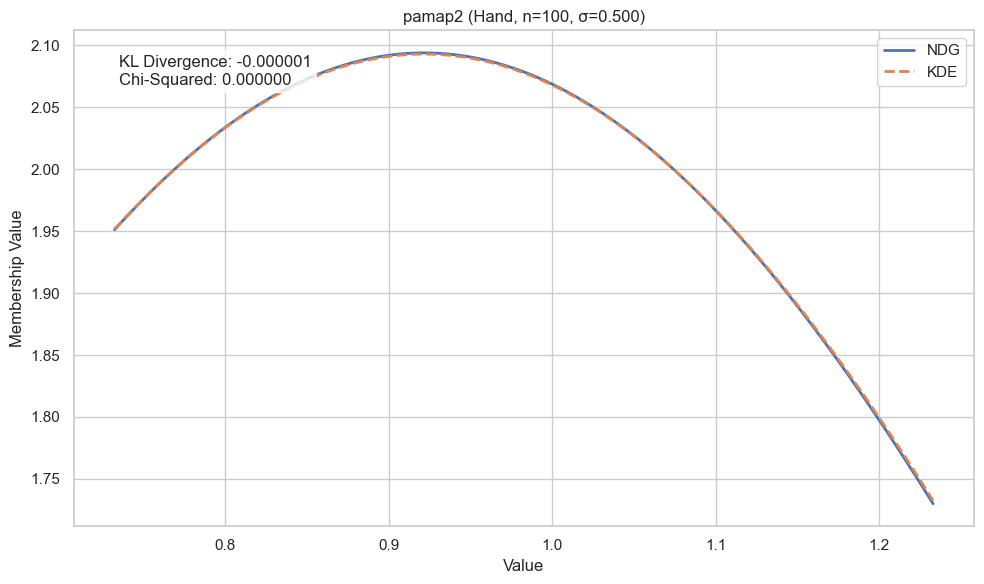

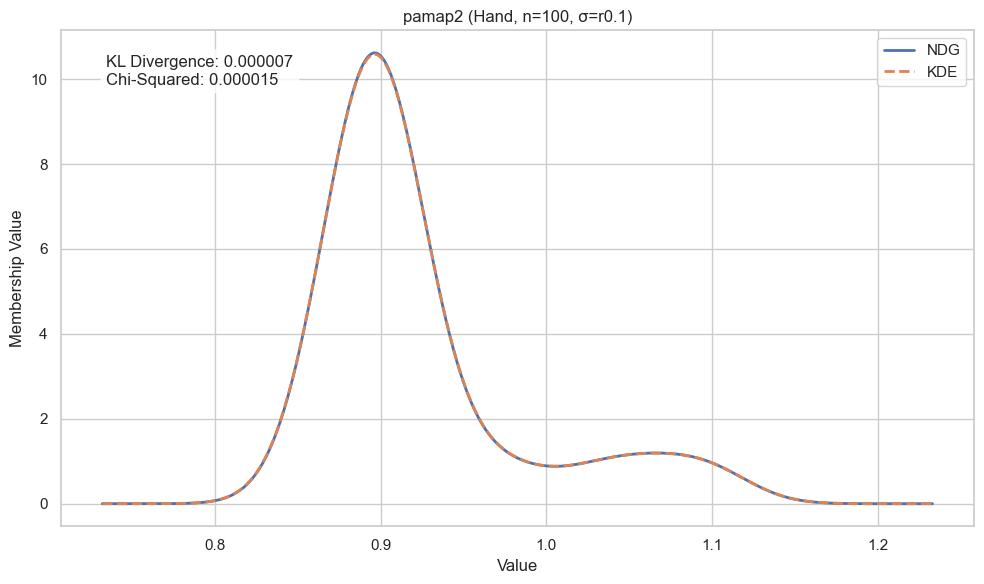

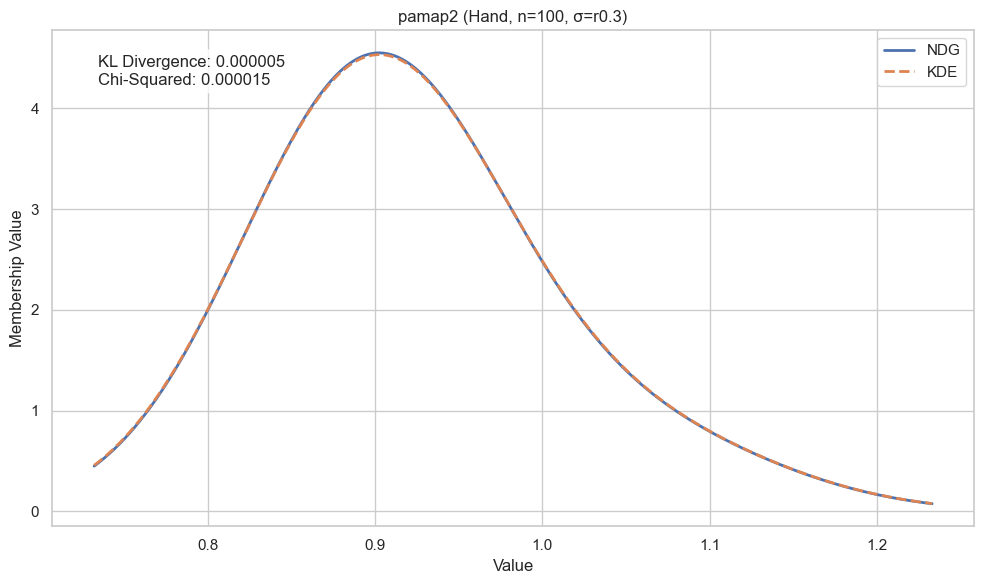

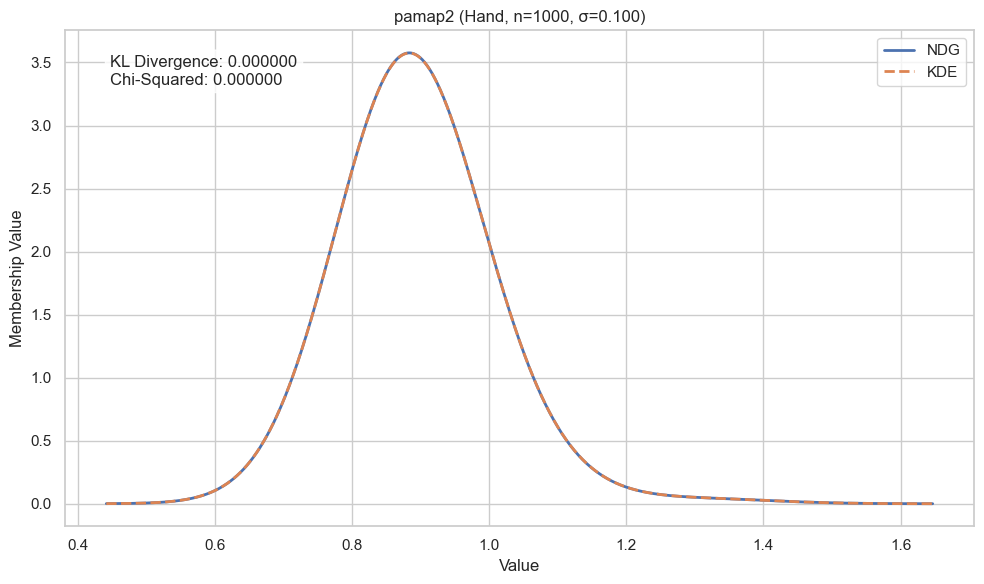

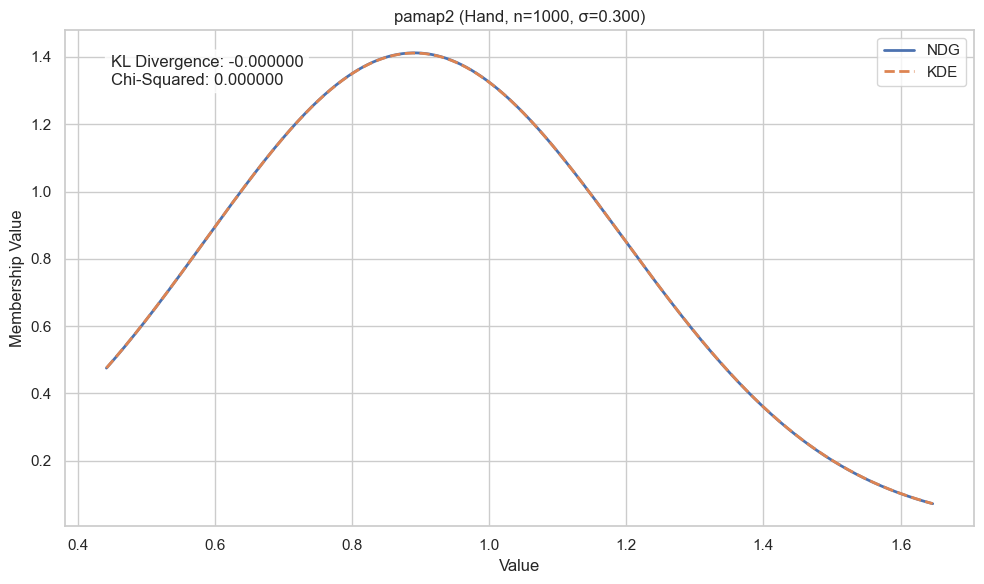

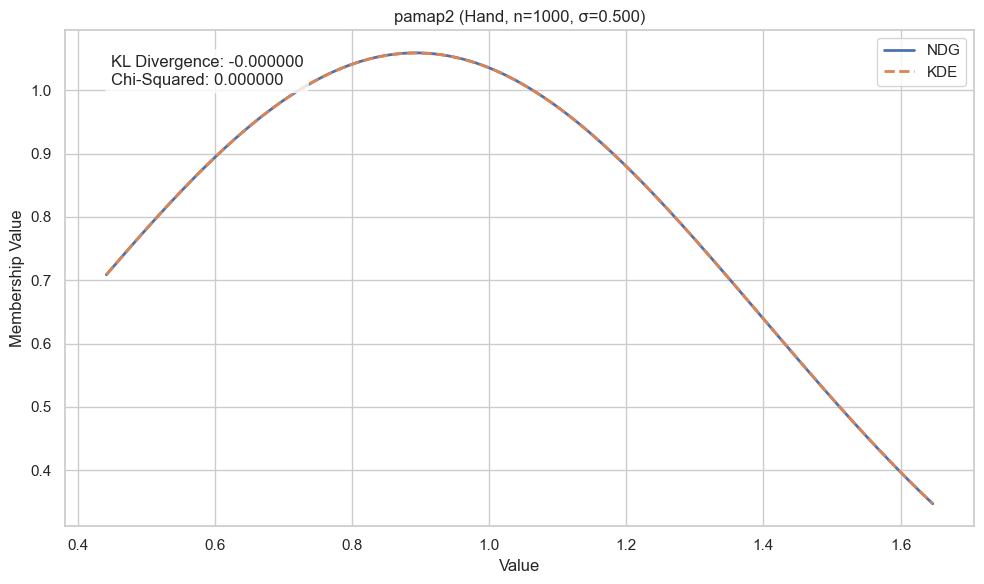

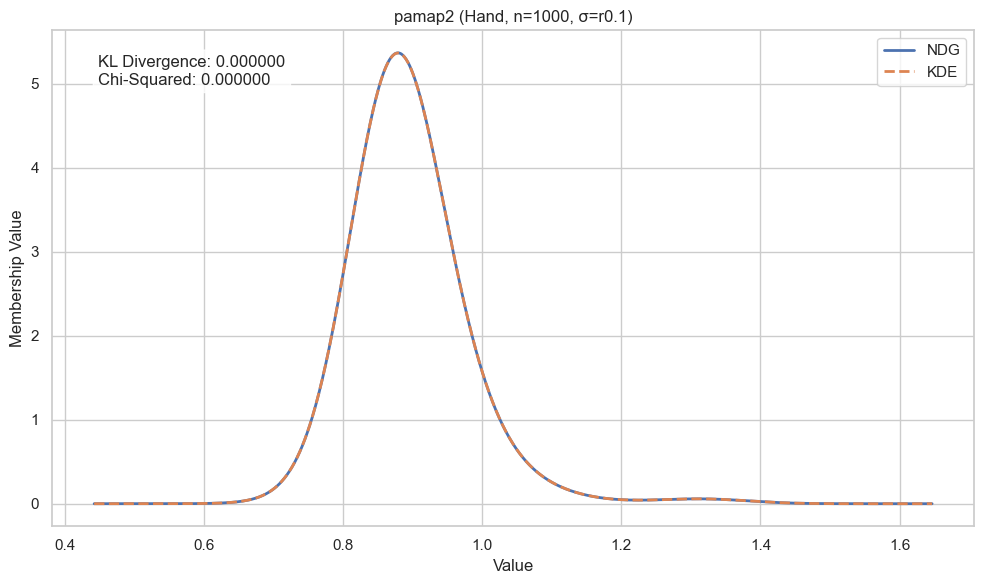

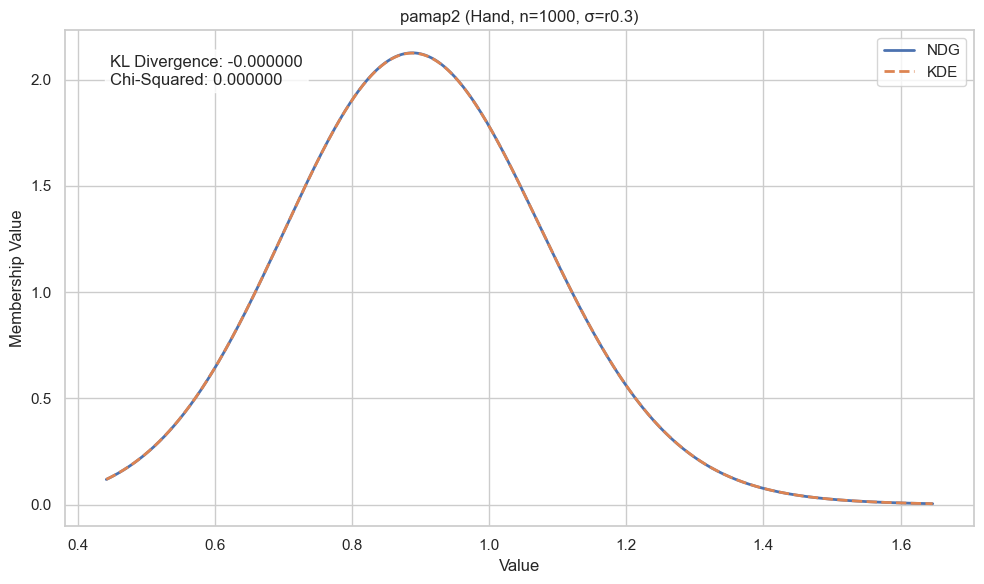

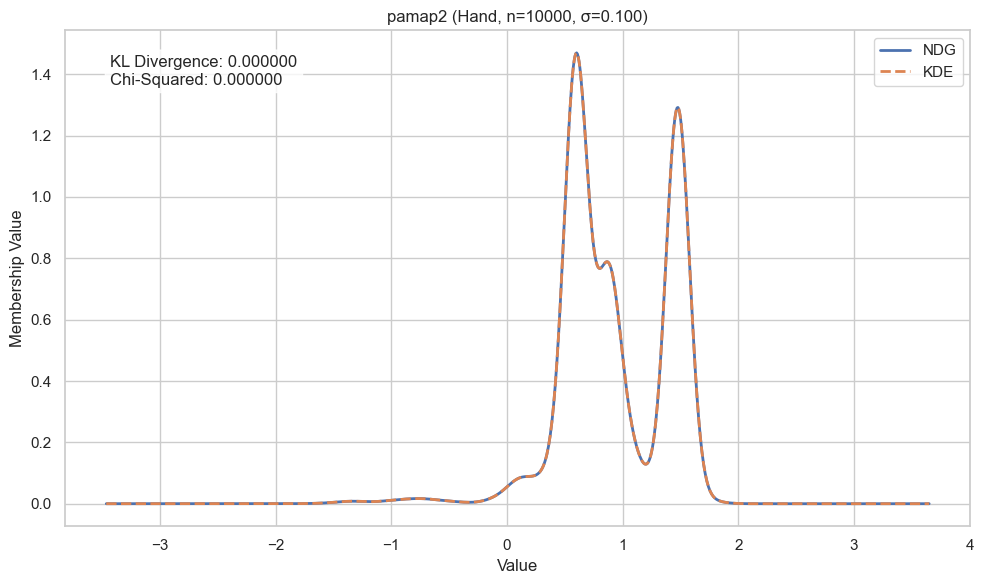

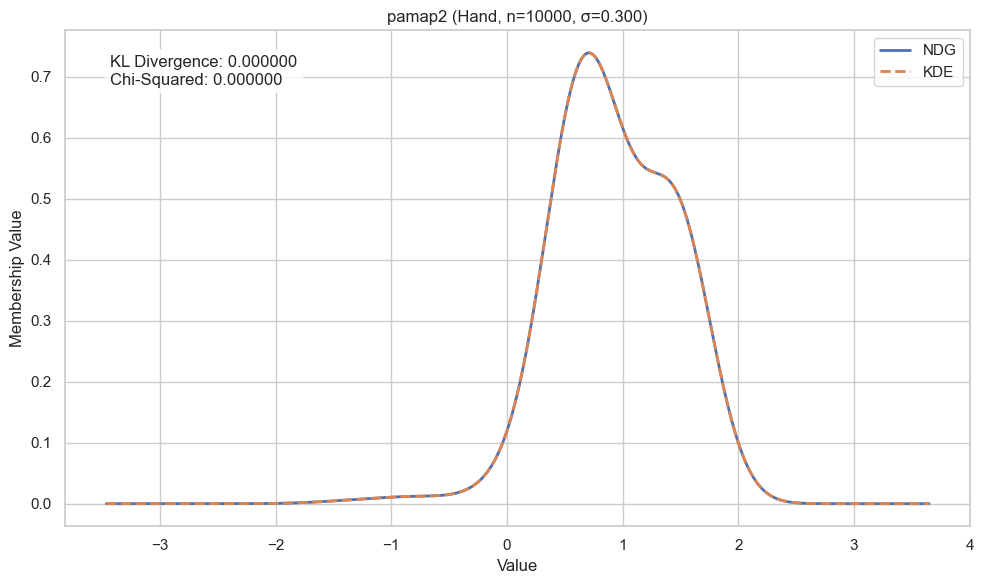

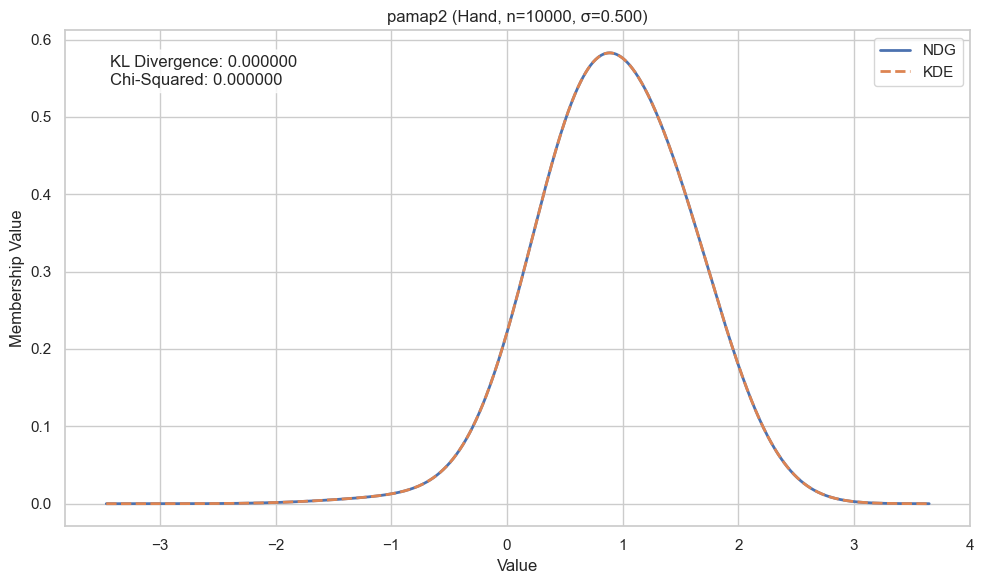

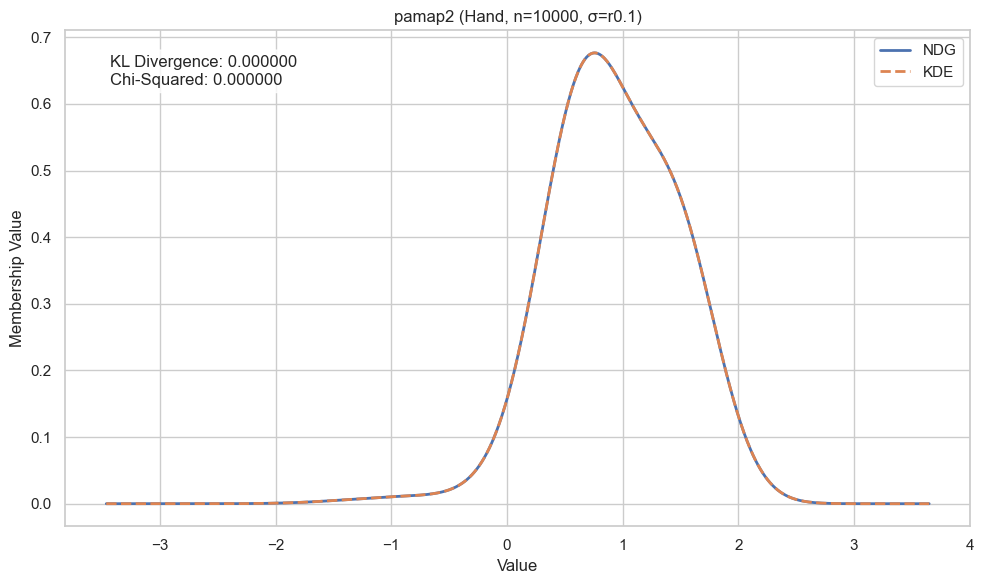

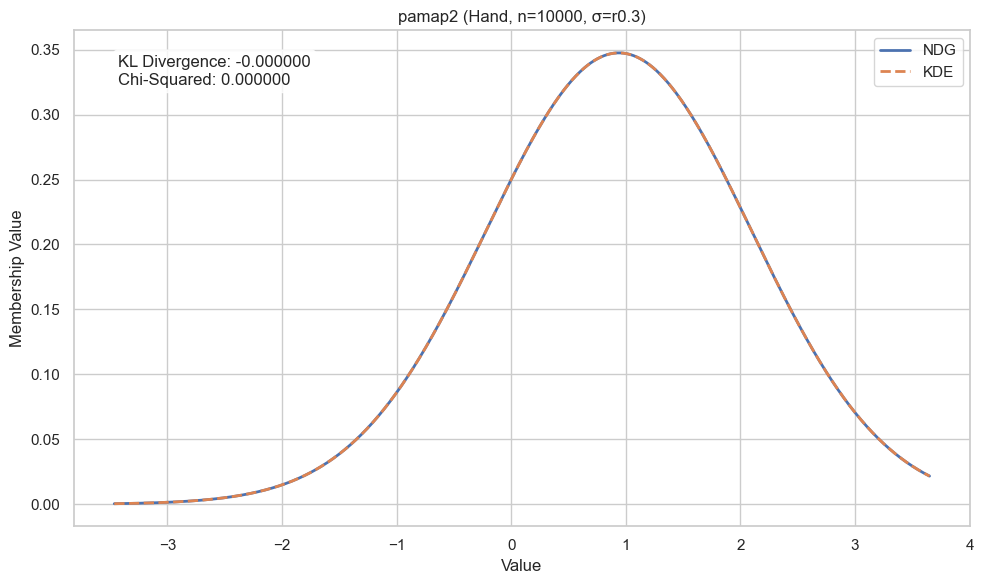

In [6]:
# Define datasets and parameters for the experiment
datasets = [
    {"name": "synthetic_normal", "sensor_loc": "normal"},
    {"name": "synthetic_bimodal", "sensor_loc": "bimodal"},
    {"name": "opportunity", "sensor_loc": "RKN^"},
    {"name": "pamap2", "sensor_loc": "Hand"}
]

# Use fewer lengths and sigmas for quicker execution in the notebook
lengths = [10, 100, 1000, 10000]
sigmas = [0.1, 0.3, 0.5, 'r0.1', 'r0.3']

# Run the experiment
length_results = experiment.run_experiments_by_length(
    datasets=datasets,
    lengths=lengths,
    sigmas=sigmas,
    k_folds=3
)

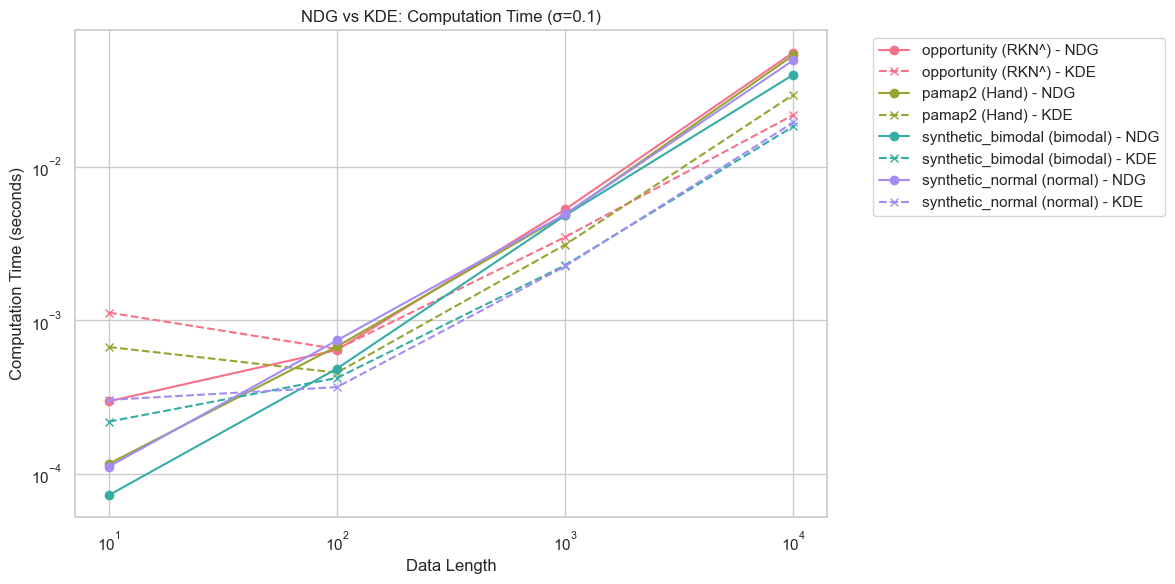

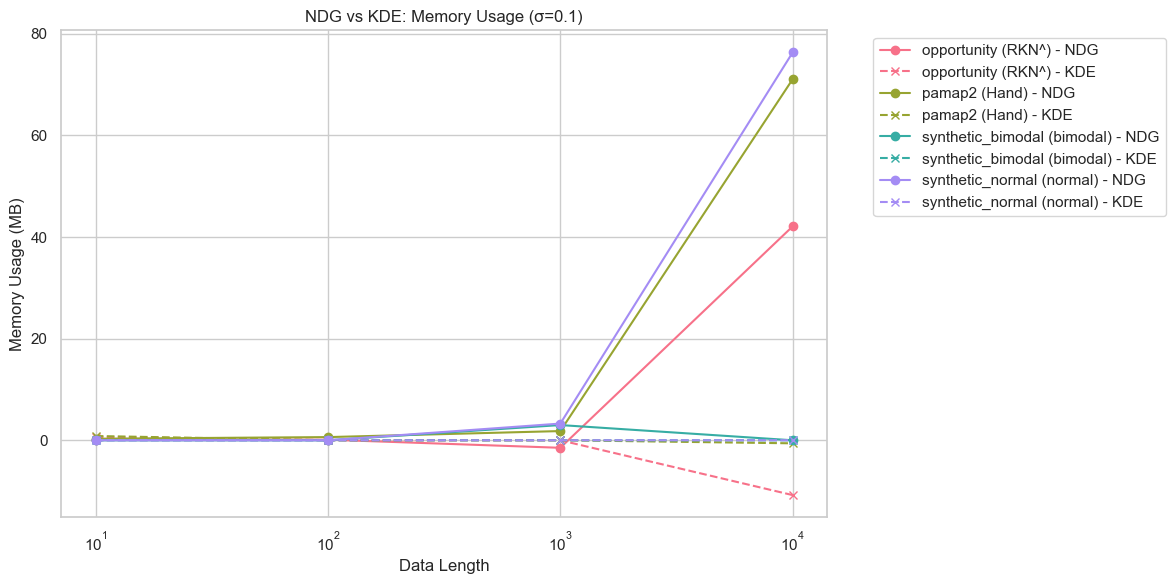

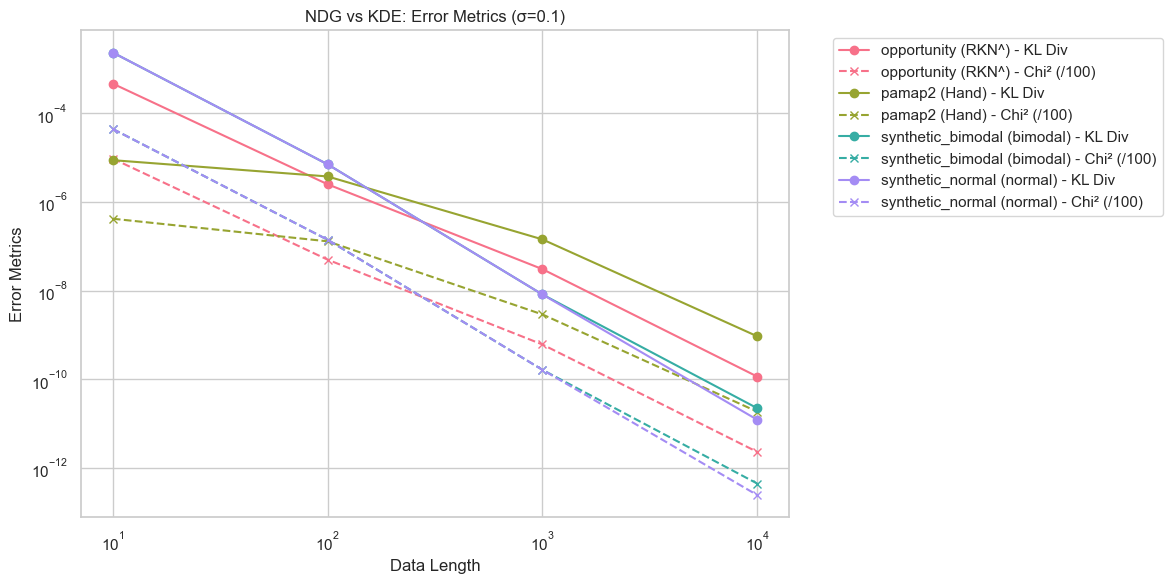

In [7]:
# Plot summary results by length
fig_time, fig_memory, fig_error = experiment.plot_length_experiment_results(length_results)

/Users/nterlemes/personal/thesis/ndg_vs_kde_experiment.py:724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ratio'] = data['sigma'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)
/Users/nterlemes/personal/thesis/ndg_vs_kde_experiment.py:724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ratio'] = data['sigma'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)
/Users/nterlemes/personal/thesis/ndg_vs_kde_experiment.py:724: SettingWithCopyWarning: 
A value is trying to be set 

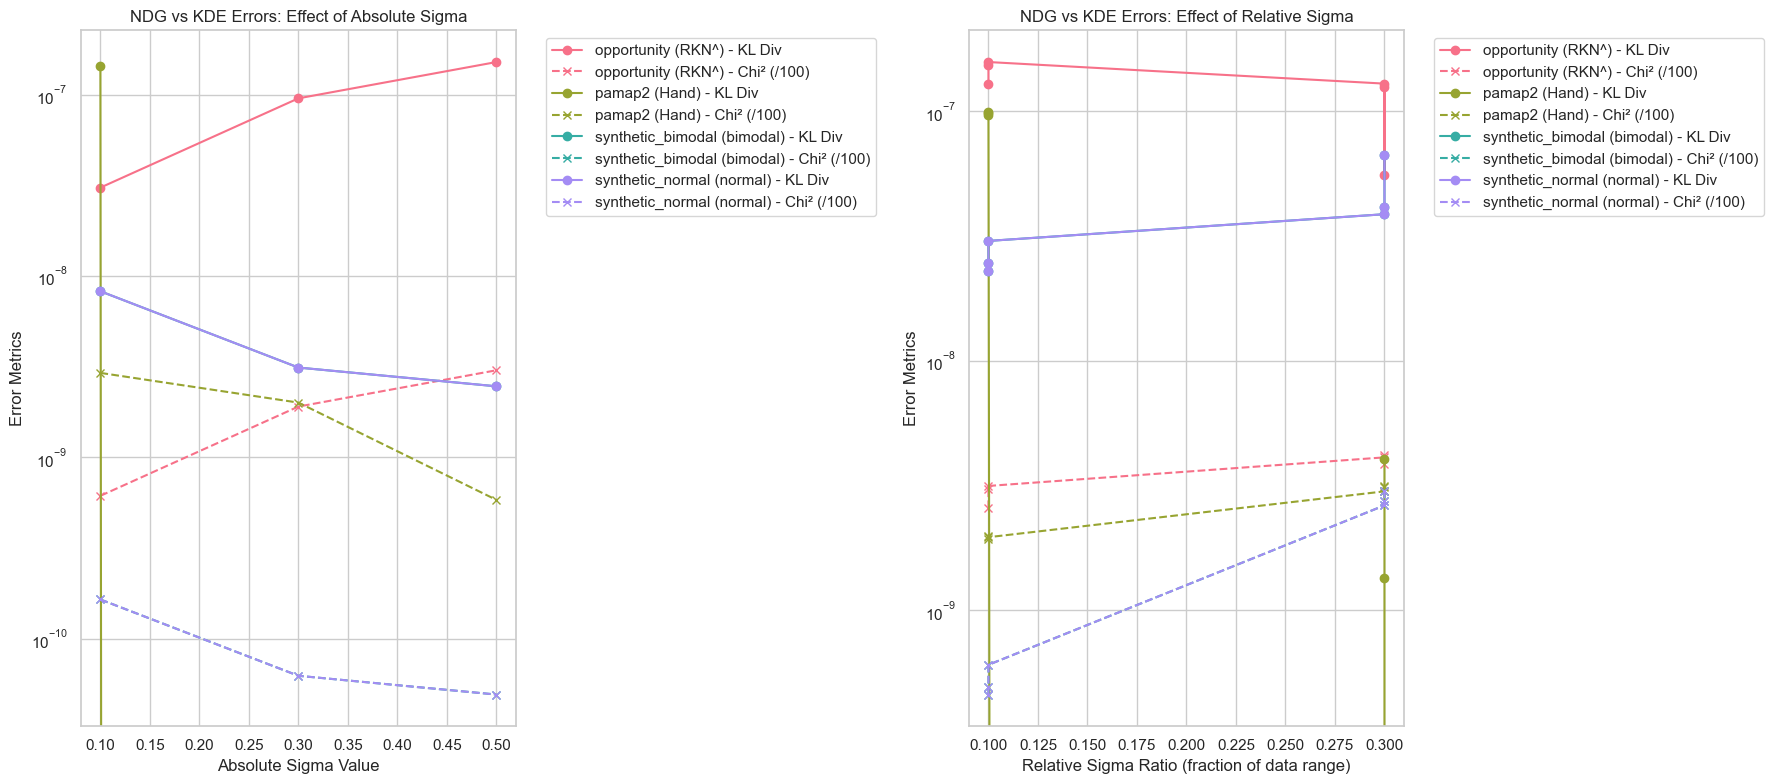

In [8]:
# Plot summary results by sigma
fig_sigma = experiment.plot_sigma_experiment_results(length_results)

## 6. Save Results

Finally, let's save the results to disk for later analysis.

In [9]:
import os

# Create the results directory if it doesn't exist
os.makedirs("../results/ndg_vs_kde", exist_ok=True)

# Save the summary plots
fig_time.savefig("..results/ndg_vs_kde/time_comparison.png", dpi=300, bbox_inches="tight")
fig_memory.savefig("..results/ndg_vs_kde/memory_comparison.png", dpi=300, bbox_inches="tight")
fig_error.savefig("..results/ndg_vs_kde/error_comparison.png", dpi=300, bbox_inches="tight")
fig_sigma.savefig("..results/ndg_vs_kde/sigma_comparison.png", dpi=300, bbox_inches="tight")

# Save CSV data (without figure objects)
csv_data = length_results.drop(columns=['figure'])
csv_data.to_csv("..results/ndg_vs_kde/experiment_results.csv", index=False)

print("Results saved to '../results/ndg_vs_kde/' directory")

Results saved to 'results/ndg_vs_kde/' directory


## 7. Conclusion

Based on the experiments, we can observe:

1. **Sigma Effect**: How different sigma values (both absolute and relative) affect the accuracy of NDG membership functions compared to KDE.
   - Relative sigma values (as a fraction of data range) may provide more consistent results across different data scales.
   - Optimal sigma values may differ depending on the dataset characteristics.

2. **Data Length Effect**: 
   - How the error metrics change as data length increases
   - Performance characteristics (time and memory) for both methods at different scales

3. **Dataset Type Insights**:
   - Different behaviors for unimodal vs. bimodal distributions
   - Synthetic vs. real sensor data comparisons

These findings are important for choosing the appropriate method and parameters for real-time sensor data processing in health applications, where both accuracy and computational efficiency are critical.